In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from datetime import datetime

# Rough Overview of the data and what we're working with

In [3]:
ab = pd.read_csv('../data/habsos_20230714.csv', parse_dates=['SAMPLE_DATE'])

C:\Users\Peter Doze\AppData\Local\Temp\ipykernel_13224\1440564366.py:1: DtypeWarning: Columns (18,19,22) have mixed types. Specify dtype option on import or set low_memory=False.
  ab = pd.read_csv('../data/habsos_20230714.csv', parse_dates=['SAMPLE_DATE'])


In [4]:
ab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205552 entries, 0 to 205551
Data columns (total 24 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   STATE_ID         205552 non-null  object        
 1   DESCRIPTION      205531 non-null  object        
 2   LATITUDE         205552 non-null  float64       
 3   LONGITUDE        205552 non-null  float64       
 4   SAMPLE_DATE      205552 non-null  datetime64[ns]
 5   SAMPLE_DEPTH     200324 non-null  float64       
 6   GENUS            205552 non-null  object        
 7   SPECIES          205552 non-null  object        
 8   CATEGORY         204696 non-null  object        
 9   CELLCOUNT        205552 non-null  int64         
 10  CELLCOUNT_UNIT   205552 non-null  object        
 11  CELLCOUNT_QA     205552 non-null  int64         
 12  SALINITY         105763 non-null  float64       
 13  SALINITY_UNIT    105763 non-null  object        
 14  SALINITY_QA      205

In [5]:
AB = ab.dropna()
AB.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82 entries, 102 to 157380
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   STATE_ID         82 non-null     object        
 1   DESCRIPTION      82 non-null     object        
 2   LATITUDE         82 non-null     float64       
 3   LONGITUDE        82 non-null     float64       
 4   SAMPLE_DATE      82 non-null     datetime64[ns]
 5   SAMPLE_DEPTH     82 non-null     float64       
 6   GENUS            82 non-null     object        
 7   SPECIES          82 non-null     object        
 8   CATEGORY         82 non-null     object        
 9   CELLCOUNT        82 non-null     int64         
 10  CELLCOUNT_UNIT   82 non-null     object        
 11  CELLCOUNT_QA     82 non-null     int64         
 12  SALINITY         82 non-null     float64       
 13  SALINITY_UNIT    82 non-null     object        
 14  SALINITY_QA      82 non-null     int64

In [6]:
AB['STATE_ID'].unique()

array(['TX'], dtype=object)

## Lost a lot of rows I need to see what's happening.
## <span style="color:red">It looks like Texas is the only state with every variable filled</span>

In [7]:
AB

,STATE_ID,DESCRIPTION,LATITUDE,LONGITUDE,SAMPLE_DATE,SAMPLE_DEPTH,GENUS,SPECIES,CATEGORY,CELLCOUNT,...,SALINITY_QA,WATER_TEMP,WATER_TEMP_UNIT,WATER_TEMP_QA,WIND_DIR,WIND_DIR_UNIT,WIND_DIR_QA,WIND_SPEED,WIND_SPEED_UNIT,WIND_SPEED_QA
102,TX,West End Queen Isabella Memorial Causeway,26.07889,-97.20583,2011-09-28 17:45:00,0.3048,Karenia,brevis,low,44000,...,1,31.111111,deg. C,5.0,135.0,deg,5.0,5.753897,mph,5.0
167,TX,West End Queen Isabella Causeway,26.07889,-97.20583,2011-10-19 16:29:00,0.3048,Karenia,brevis,medium,893000,...,1,21.111111,deg. C,5.0,360.0,deg,5.0,23.015588,mph,5.0
200,TX,West End Queen Isabella Causeway,26.07889,-97.20583,2011-10-22 17:40:00,0.9144,Karenia,brevis,medium,594000,...,1,25.600000,deg. C,1.0,135.0,deg,5.0,15.000000,mph,1.0
220,TX,West End Queen Isabella Causeway,26.07889,-97.20583,2011-10-29 16:25:00,0.6096,Karenia,brevis,low,22000,...,1,20.000000,deg. C,5.0,337.5,deg,5.0,15.000000,mph,1.0
396,TX,West End Queen Isabella Causeway,26.07889,-97.20583,2011-11-26 22:35:00,0.6096,Karenia,brevis,medium,418000,...,1,25.555556,deg. C,5.0,360.0,deg,5.0,3.452338,mph,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127210,TX,Boca Chica beach at Highway 4,26.01332,-97.15163,2011-10-18 14:37:00,0.6096,Karenia,brevis,very low,4000,...,1,26.700000,deg. C,1.0,337.5,deg,5.0,17.500000,mph,5.0
127258,TX,Boca Chica beach at Highway 4,26.01332,-97.15163,2011-10-21 15:13:00,0.3048,Karenia,brevis,medium,469000,...,1,24.444444,deg. C,5.0,135.0,deg,5.0,17.500000,mph,5.0
128411,TX,Bahia Grande Southwest Corner,26.01221,-97.28204,2011-09-28 17:25:00,0.3048,Karenia,brevis,high,10962000,...,1,33.333333,deg. C,5.0,135.0,deg,5.0,2.301559,mph,5.0
128412,TX,Bahia Grande Southwest Corner,26.01221,-97.28204,2011-10-03 14:40:00,0.3048,Karenia,brevis,not observed,0,...,1,23.333333,deg. C,5.0,90.0,deg,5.0,5.753897,mph,5.0


In [8]:
ab.iloc[101]

STATE_ID                            FL
DESCRIPTION           Lido Beach; W of
LATITUDE                      27.31002
LONGITUDE                    -82.57707
SAMPLE_DATE        2016-01-28 14:00:00
SAMPLE_DEPTH                       0.5
GENUS                          Karenia
SPECIES                         brevis
CATEGORY                          high
CELLCOUNT                     35267000
CELLCOUNT_UNIT                 cells/L
CELLCOUNT_QA                         1
SALINITY                           NaN
SALINITY_UNIT                      NaN
SALINITY_QA                          9
WATER_TEMP                         NaN
WATER_TEMP_UNIT                    NaN
WATER_TEMP_QA                      9.0
WIND_DIR                           NaN
WIND_DIR_UNIT                      NaN
WIND_DIR_QA                        9.0
WIND_SPEED                         NaN
WIND_SPEED_UNIT                    NaN
WIND_SPEED_QA                      9.0
Name: 101, dtype: object

## <span style="color:red"> It looks like most rows have a nan somewhere so dropna gets rid of most of everything, need to prioritize features</span>

## Online research implies that temperature and salinity are major features of forecasting algae blooms 
## I want to see what I have left when I just dropna for those columns and don't worry about the wind

In [9]:
AB2 = ab.dropna(subset=['SALINITY','WATER_TEMP'], how='any')
AB2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94214 entries, 0 to 205546
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   STATE_ID         94214 non-null  object        
 1   DESCRIPTION      94202 non-null  object        
 2   LATITUDE         94214 non-null  float64       
 3   LONGITUDE        94214 non-null  float64       
 4   SAMPLE_DATE      94214 non-null  datetime64[ns]
 5   SAMPLE_DEPTH     91609 non-null  float64       
 6   GENUS            94214 non-null  object        
 7   SPECIES          94214 non-null  object        
 8   CATEGORY         93931 non-null  object        
 9   CELLCOUNT        94214 non-null  int64         
 10  CELLCOUNT_UNIT   94214 non-null  object        
 11  CELLCOUNT_QA     94214 non-null  int64         
 12  SALINITY         94214 non-null  float64       
 13  SALINITY_UNIT    94214 non-null  object        
 14  SALINITY_QA      94214 non-null  int6

## <span style="color:red"> Only lost about 100,000 rows when we dropna for temp and salinity, if we stick with this it should be enough data? </span>

In [10]:
AB2['STATE_ID'].unique()

array(['FL', 'TX', 'AL', 'MS'], dtype=object)

In [11]:
AB2.groupby('STATE_ID')['DESCRIPTION'].count()

STATE_ID
AL     1471
FL    90323
MS      775
TX     1633
Name: DESCRIPTION, dtype: int64

## <span style="color:red"> Got all the states back when only dropna for temp and salinity</span>

## Texas is the only state with at least some rows completely filled, might want to focus on Texas? Try to salvage the wind data in Texas?

## Lets investigate if we can get good timeseries for each region in a state or determine if we have to treat each state as a whole entity. Focus on Texas for now.

In [12]:
abtexas = AB2.loc[AB2.STATE_ID=='TX']
abtexas['STATE_ID'].unique() #just checking

array(['TX'], dtype=object)

In [13]:
abtexas.info() #just checking

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1633 entries, 102 to 157599
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   STATE_ID         1633 non-null   object        
 1   DESCRIPTION      1633 non-null   object        
 2   LATITUDE         1633 non-null   float64       
 3   LONGITUDE        1633 non-null   float64       
 4   SAMPLE_DATE      1633 non-null   datetime64[ns]
 5   SAMPLE_DEPTH     1304 non-null   float64       
 6   GENUS            1633 non-null   object        
 7   SPECIES          1633 non-null   object        
 8   CATEGORY         1633 non-null   object        
 9   CELLCOUNT        1633 non-null   int64         
 10  CELLCOUNT_UNIT   1633 non-null   object        
 11  CELLCOUNT_QA     1633 non-null   int64         
 12  SALINITY         1633 non-null   float64       
 13  SALINITY_UNIT    1633 non-null   object        
 14  SALINITY_QA      1633 non-null   int

In [14]:
len(abtexas.DESCRIPTION.unique())

469

In [15]:
abtexas.groupby('DESCRIPTION')[['SALINITY','WATER_TEMP']].count()

,SALINITY,WATER_TEMP
DESCRIPTION,,
0.1 miles north of Rio Grande,1,1
"1 mi N of Beach Access Rd 6, South Padre Island",1,1
1 mi. S Matagorda Ship Channel Jetty Matagorda,1,1
"1 mi. offshore, 14 mi. north of Brazos Santiago Pass (grid 3066)",1,1
"1 mi. offshore, 6 mi. north of Brazos Santiago Pass (grid 3147)",1,1
...,...,...
north part of Aransas Bay,1,1
offshore Key Allegro,5,5
offshore Key Allegro #2,1,1


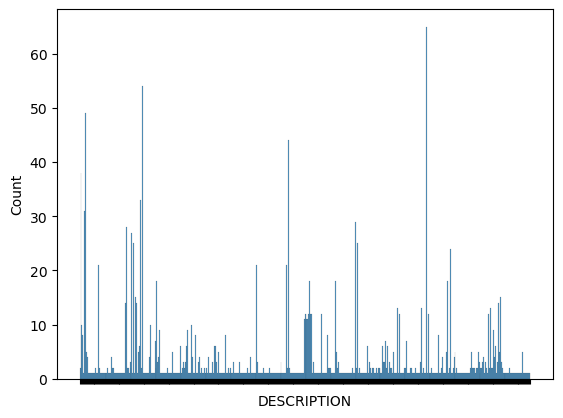

In [16]:
ax = sns.histplot(data=abtexas, x='DESCRIPTION')
ax.set(xticklabels=[]) #turn off labels cause unnecessary and I know every tick is a region in Texas
plt.show()

## <span style="color:black"> It looks like we can get some regions that are relatively big i.e >20 timestamps so we have to consider how many of these "big" regions we can get per state? and is this representative of the regions that don't have many timestamps? It might be better to just look at the state as a whole</span>  

In [17]:
abalabama = AB2.loc[AB2.STATE_ID=='AL']
abflorida = AB2.loc[AB2.STATE_ID=='FL']
abmississippi = AB2.loc[AB2.STATE_ID=='MS']

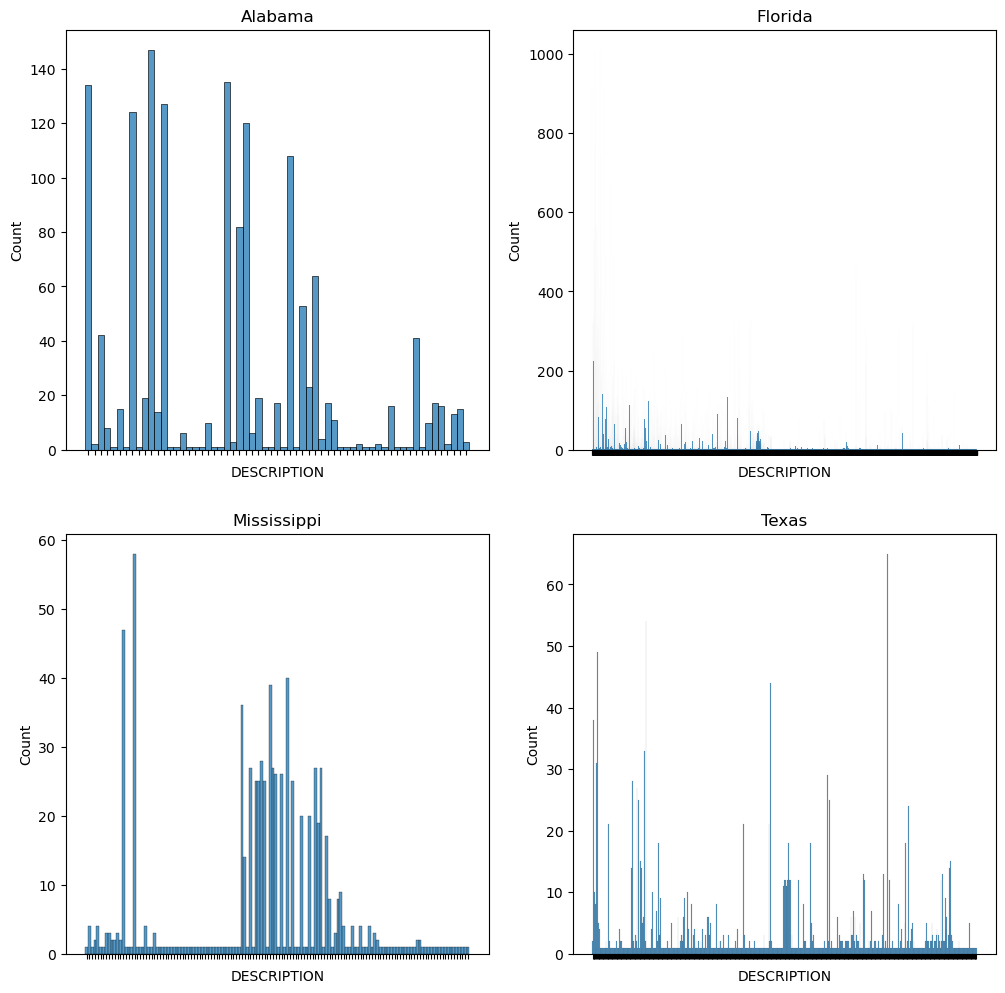

In [18]:
fig, axes = plt.subplots(2,2,figsize=(12,12))

sns.histplot(ax=axes[0,0], data=abalabama, x='DESCRIPTION')
axes[0,0].set_title('Alabama')
axes[0,0].set(xticklabels=[]) 

sns.histplot(ax=axes[0,1], data=abflorida, x='DESCRIPTION')
axes[0,1].set_title('Florida')
axes[0,1].set(xticklabels=[])

sns.histplot(ax=axes[1,0], data=abmississippi, x='DESCRIPTION')
axes[1,0].set_title('Mississippi')
axes[1,0].set(xticklabels=[])

sns.histplot(ax=axes[1,1], data=abtexas, x='DESCRIPTION')
axes[1,1].set_title('Texas')
axes[1,1].set(xticklabels=[])
plt.show()

# Lets look at the frequency of the blooms for the entire dataset, for each state, and then try to group by lat/long

## Entire Dataset

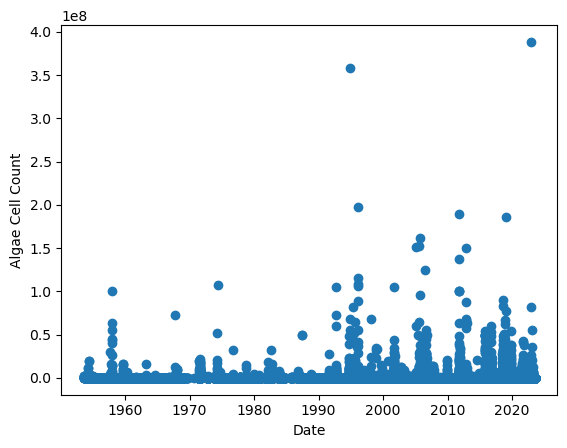

In [20]:
plt.scatter(ab['SAMPLE_DATE'],ab['CELLCOUNT'])
plt.xlabel('Date')
plt.ylabel('Algae Cell Count')
plt.show()

## <span style=color:red> OK so the blooms picked up near the 2000's. It looks a bit periodic in the busy half </span> <span style=color:purple> Might want to only use data from 90's onward? Then use last few years as testing set </span>

## States

Text(0, 0.5, 'Algae Cell Count')

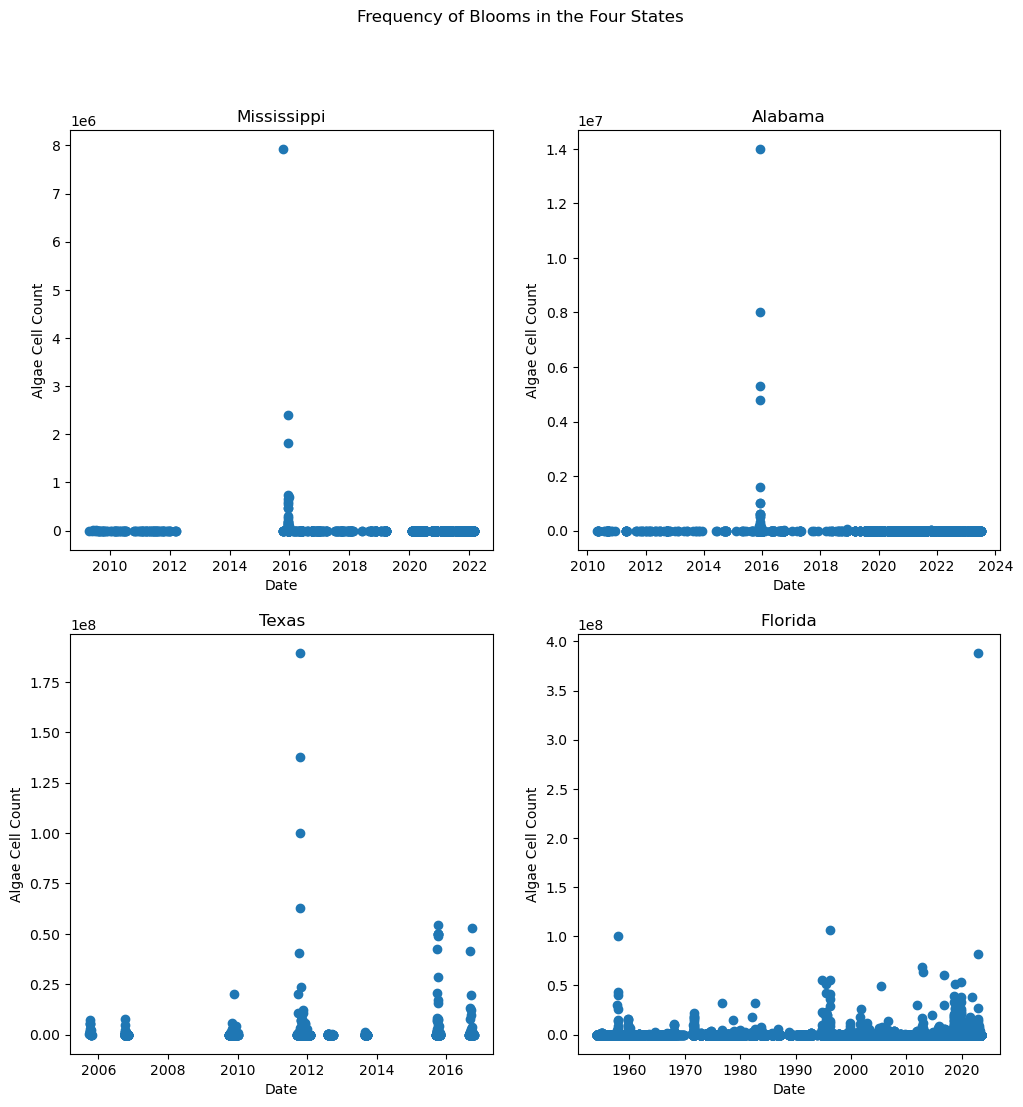

In [32]:
fig, axes = plt.subplots(2,2,figsize=(12,12))
fig.suptitle('Frequency of Blooms in the Four States')
axes[0,0].scatter(abmississippi['SAMPLE_DATE'], abmississippi['CELLCOUNT'])
axes[0,0].set_title('Mississippi')
axes[0,0].set_xlabel('Date')
axes[0,0].set_ylabel('Algae Cell Count')
#axes[0,0].set_ylim([0, 1e7])

axes[0,1].scatter(abalabama['SAMPLE_DATE'], abalabama['CELLCOUNT'])
axes[0,1].set_title('Alabama')
axes[0,1].set_xlabel('Date')
axes[0,1].set_ylabel('Algae Cell Count')
#axes[0,1].set_ylim([0, 1e7])

axes[1,0].scatter(abtexas['SAMPLE_DATE'], abtexas['CELLCOUNT'])
axes[1,0].set_title('Texas')
axes[1,0].set_xlabel('Date')
axes[1,0].set_ylabel('Algae Cell Count')
#axes[1,0].set_ylim([0, 1e7])

axes[1,1].scatter(abflorida['SAMPLE_DATE'], abflorida['CELLCOUNT'])
axes[1,1].set_title('Florida')
axes[1,1].set_xlabel('Date')
axes[1,1].set_ylabel('Algae Cell Count')
#axes[1,1].set_ylim([0, 1e7])

## <span style=color:red> We don't have full time data for every state the lowest common date seems to be 2010</span> 

In [ ]:
#Alabama

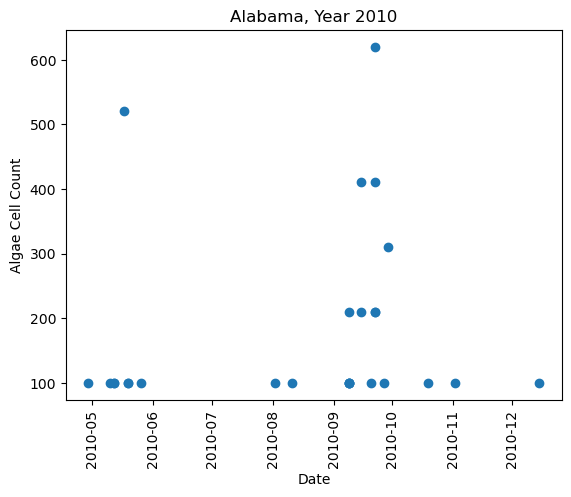

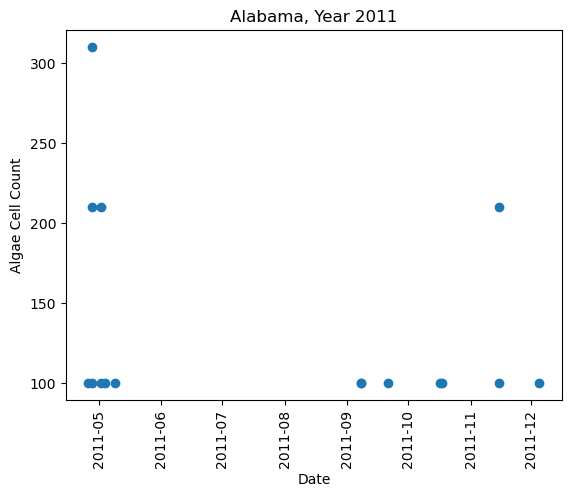

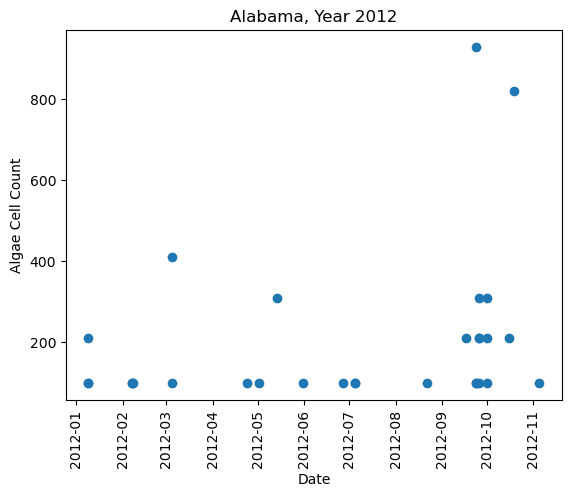

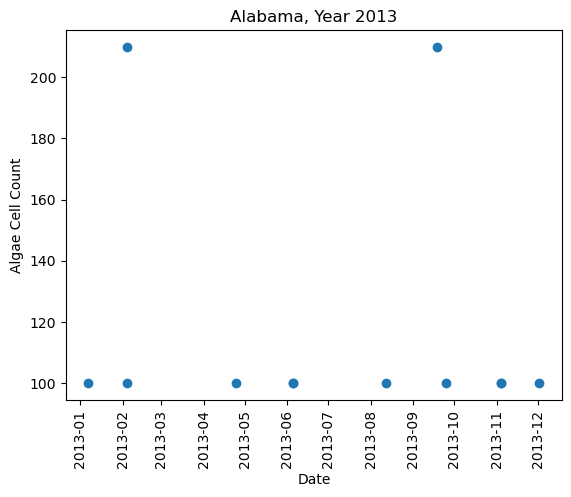

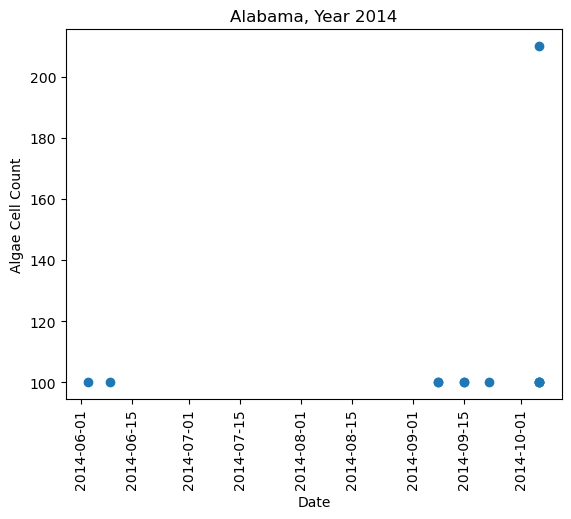

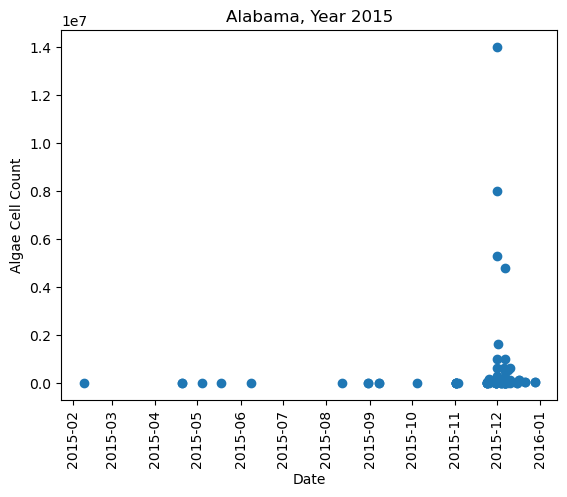

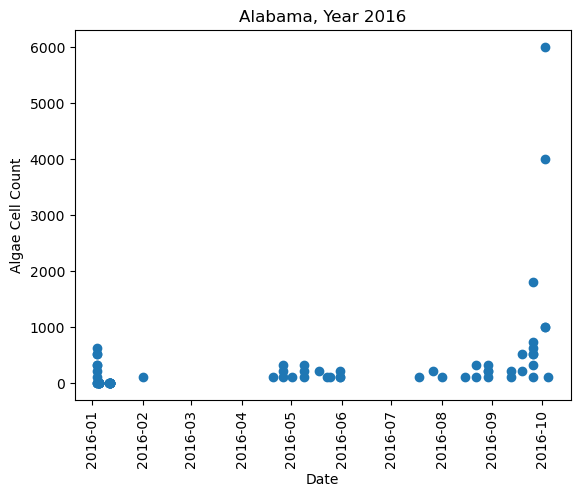

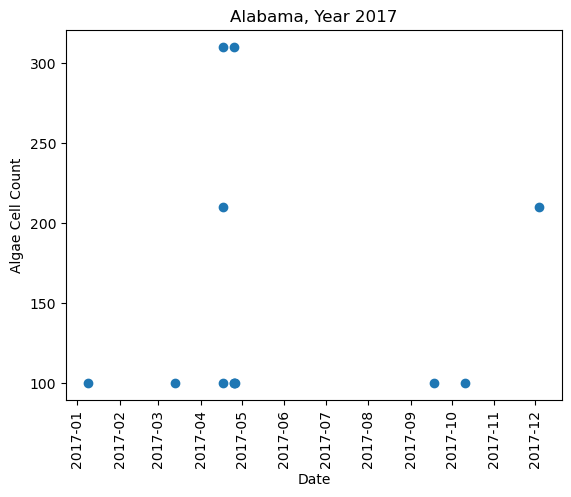

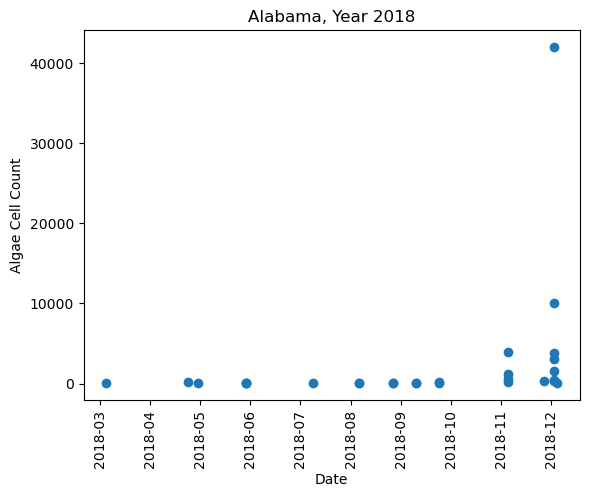

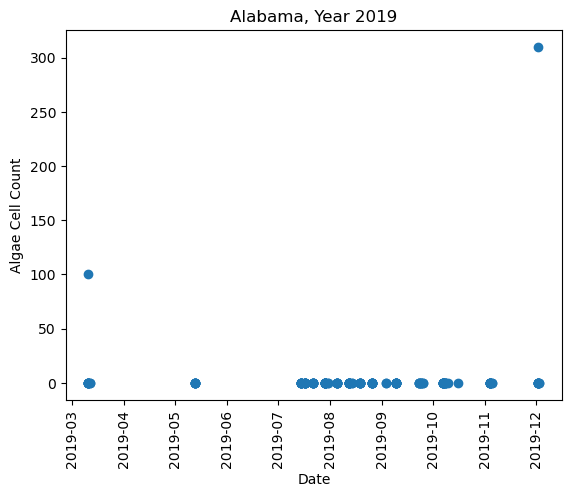

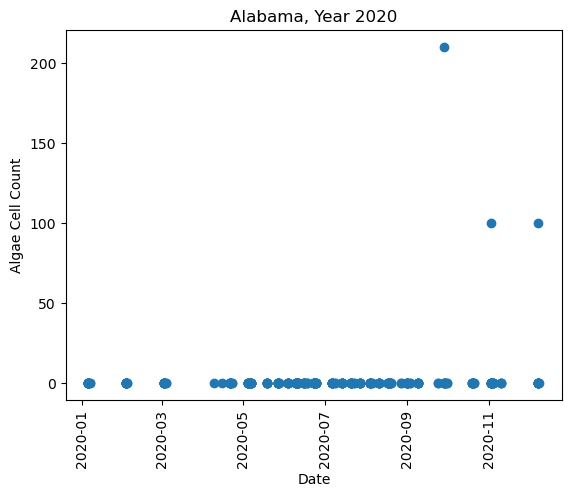

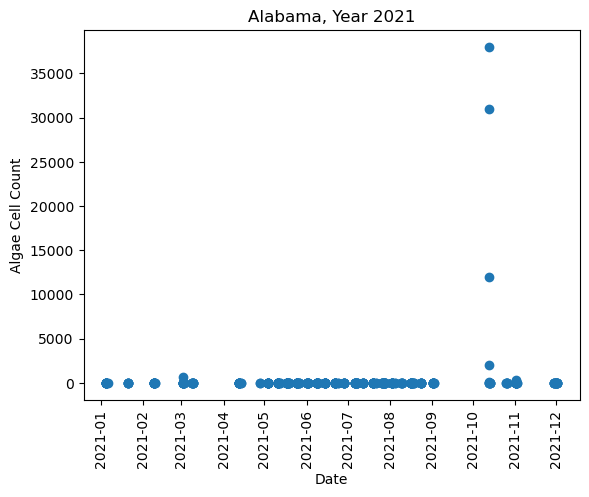

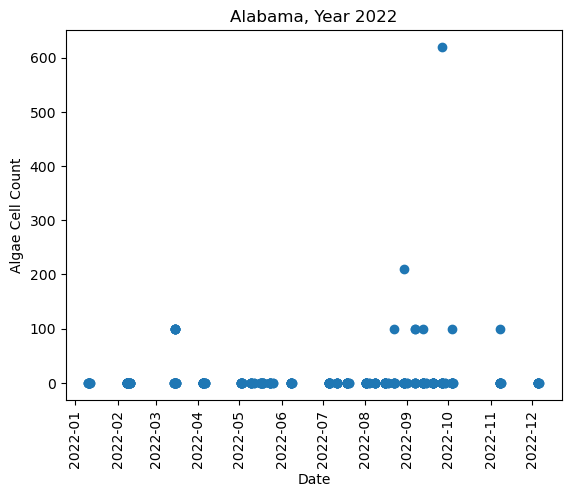

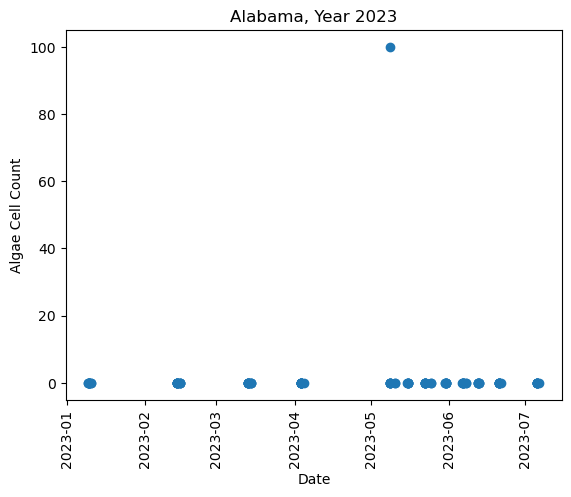

In [66]:
#Looking at the spacing of the sample dates
#abalabama['SAMPLE_DATE']

for i in range(2010,2024):
    plt.figure()
    y = abalabama.loc[(abalabama.SAMPLE_DATE >= datetime(i,1,1)) 
                      & (abalabama.SAMPLE_DATE < datetime(i+1,1,1))]['CELLCOUNT']
    x = abalabama.loc[(abalabama.SAMPLE_DATE >= datetime(i,1,1)) 
                      & (abalabama.SAMPLE_DATE < datetime(i+1,1,1))]['SAMPLE_DATE']

    plt.scatter(x,y)
    plt.title(f'Alabama, Year {i}')
    plt.xlabel('Date')
    plt.xticks(rotation=90)
    plt.ylabel('Algae Cell Count')
plt.show()

In [ ]:
#Mississippi

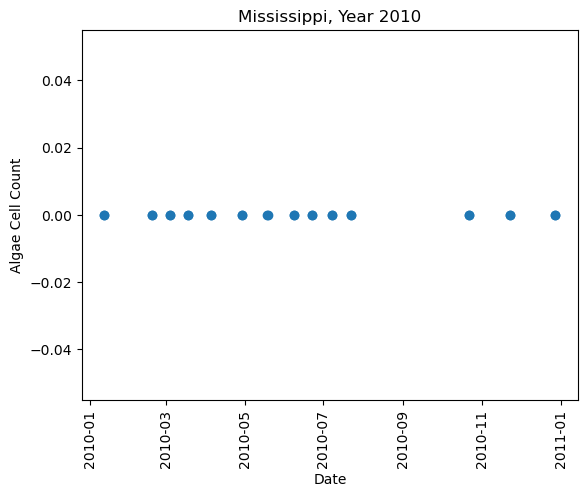

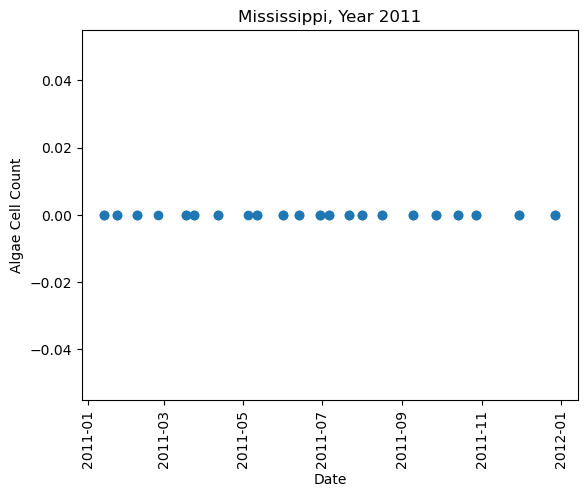

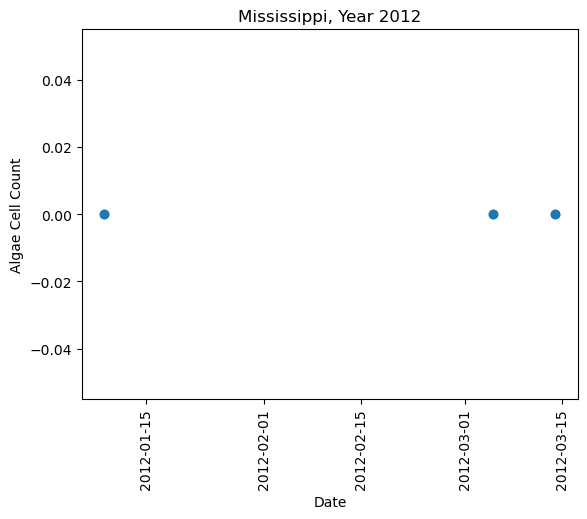

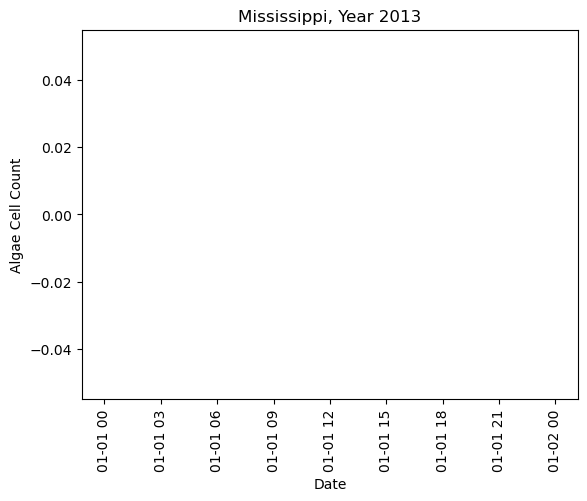

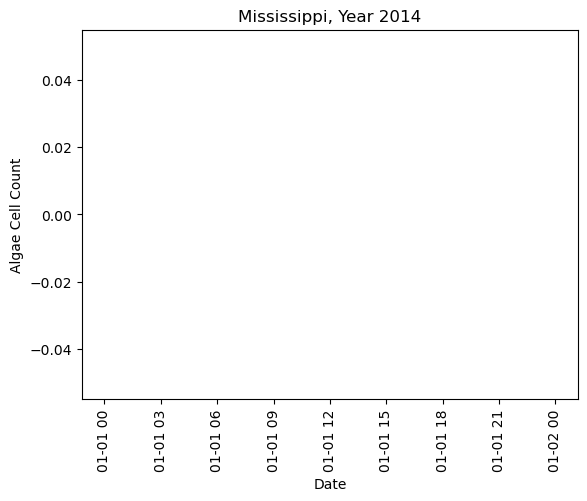

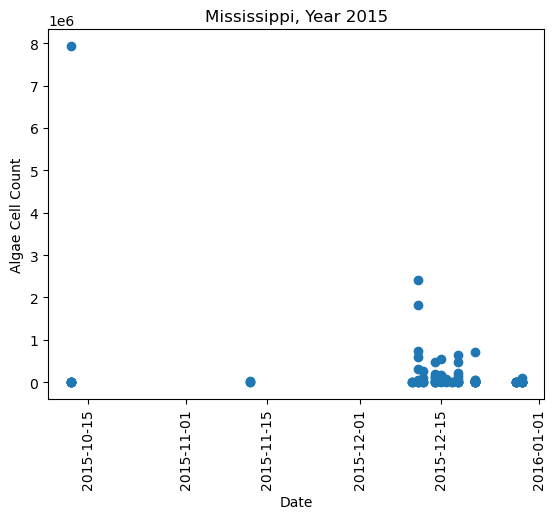

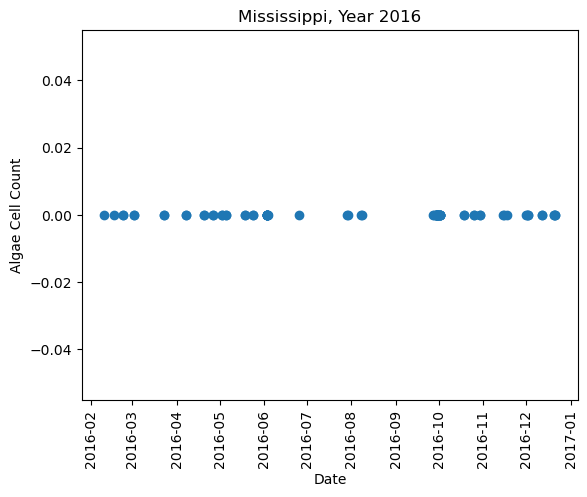

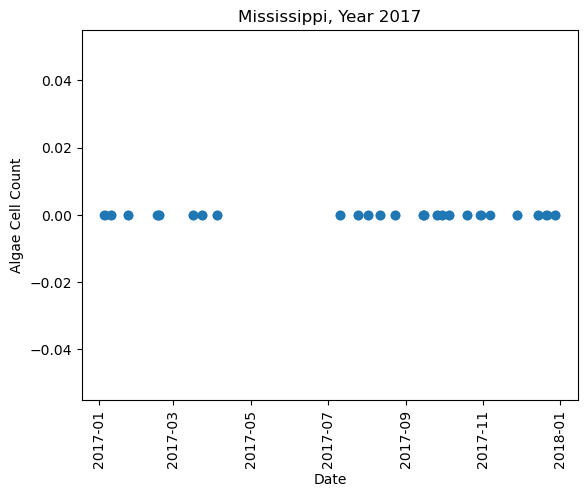

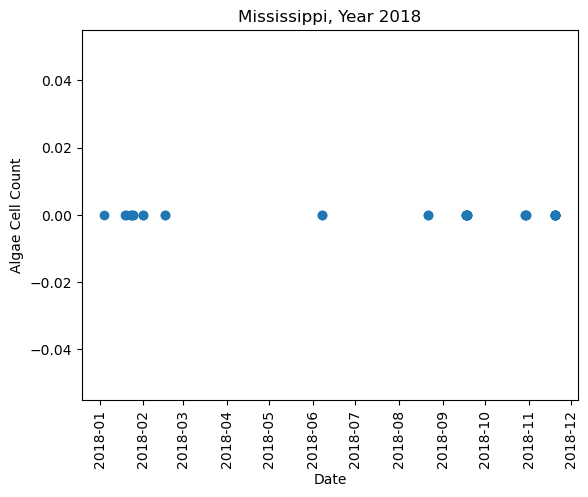

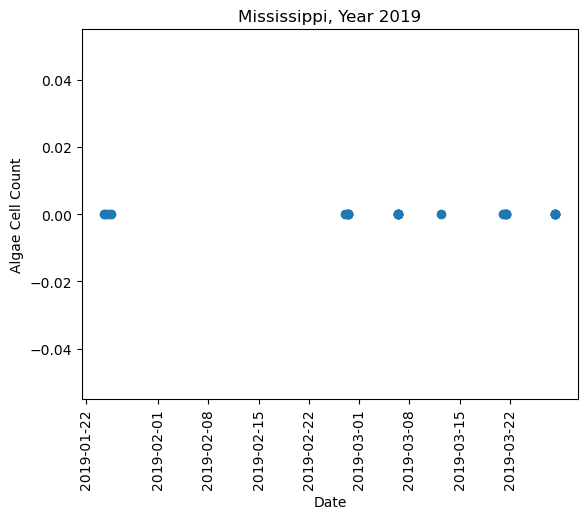

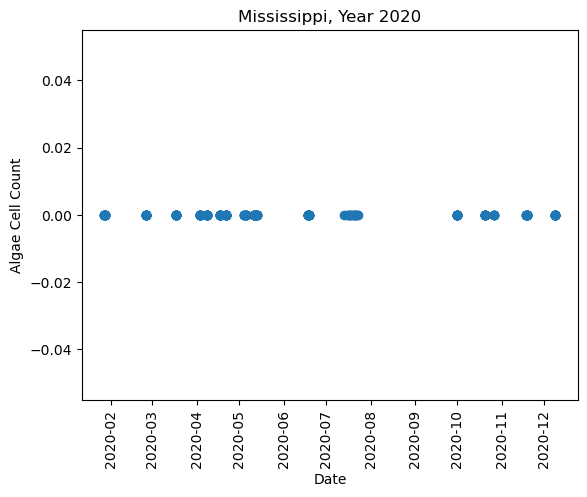

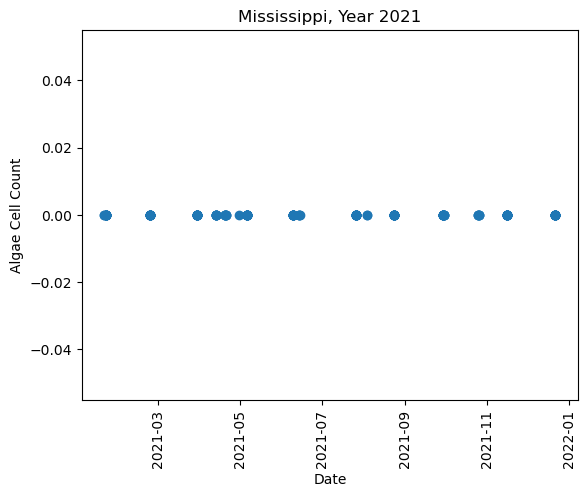

In [67]:
for i in range(2010,2022):
    plt.figure()
    y = abmississippi.loc[(abmississippi.SAMPLE_DATE >= datetime(i,1,1)) 
                      & (abmississippi.SAMPLE_DATE < datetime(i+1,1,1))]['CELLCOUNT']
    x = abmississippi.loc[(abmississippi.SAMPLE_DATE >= datetime(i,1,1)) 
                      & (abmississippi.SAMPLE_DATE < datetime(i+1,1,1))]['SAMPLE_DATE']

    plt.scatter(x,y)
    plt.title(f'Mississippi, Year {i}')
    plt.xlabel('Date')
    plt.xticks(rotation=90)
    plt.ylabel('Algae Cell Count')
plt.show()

### <span style=color:red> Mississippi is largly just zero other than the 2015 event (what happened?) we proabably shouldn't include Mississippi unless we just train on all the data and dont worry about regions</span>

In [ ]:
#Texas

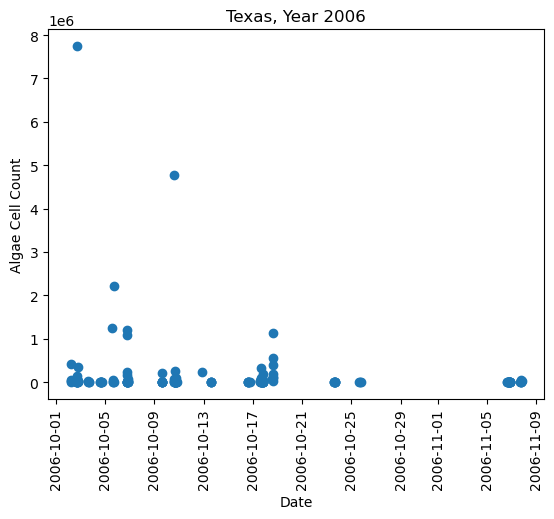

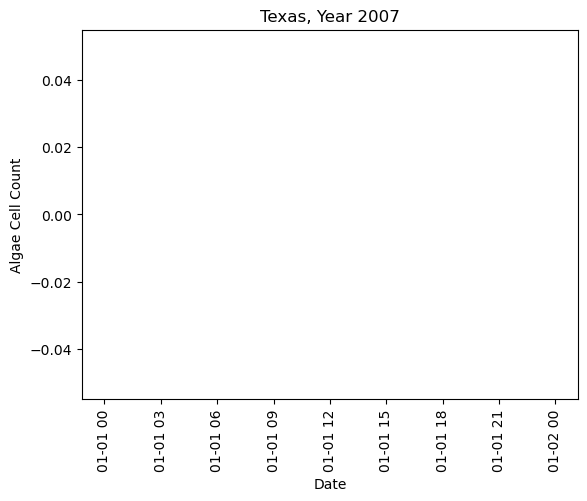

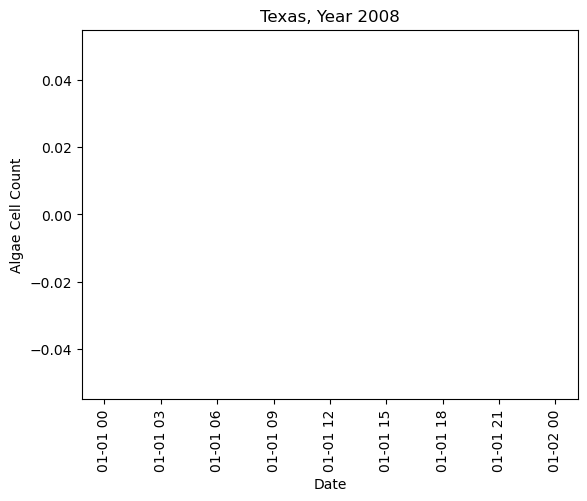

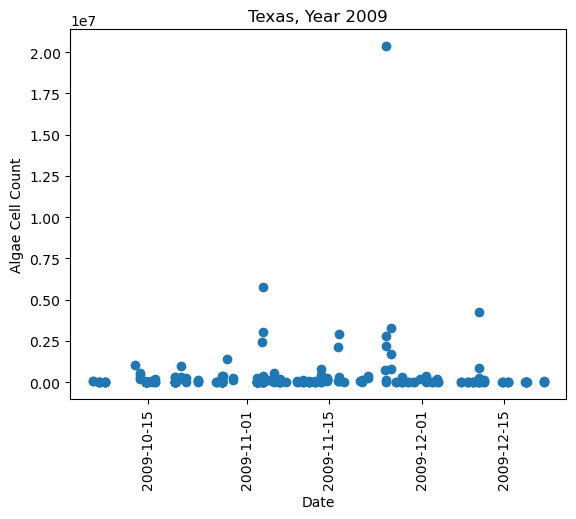

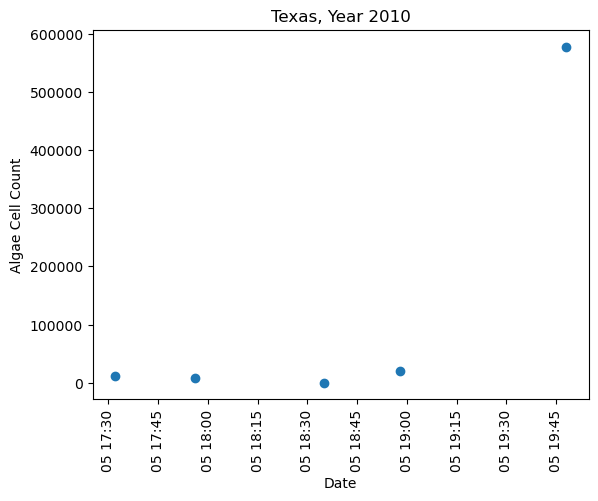

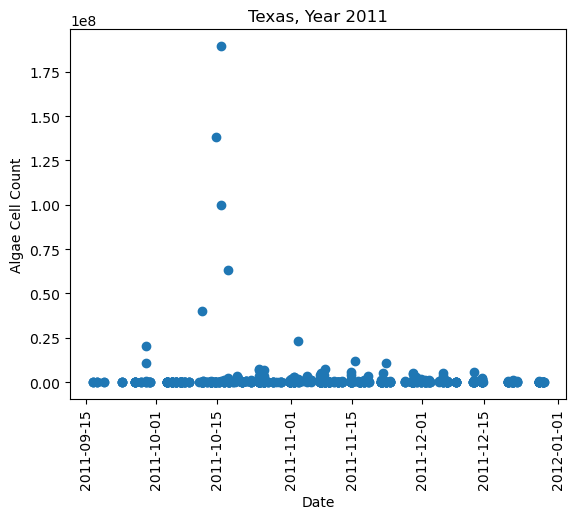

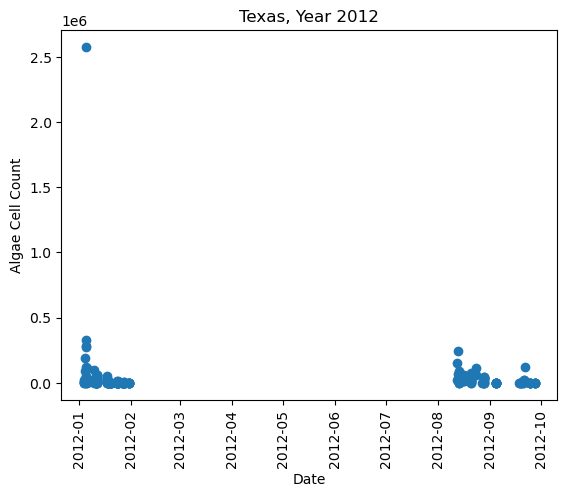

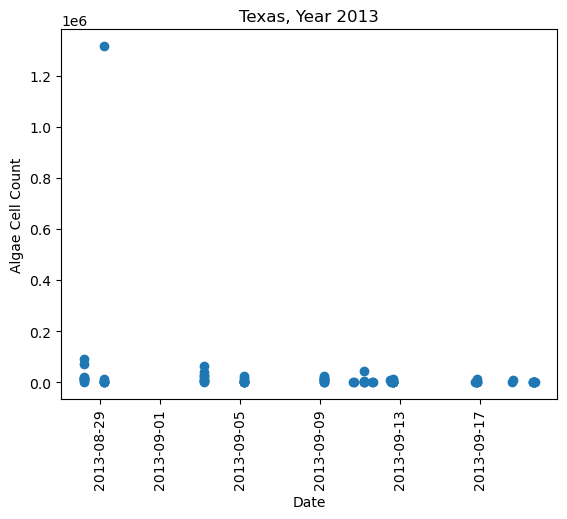

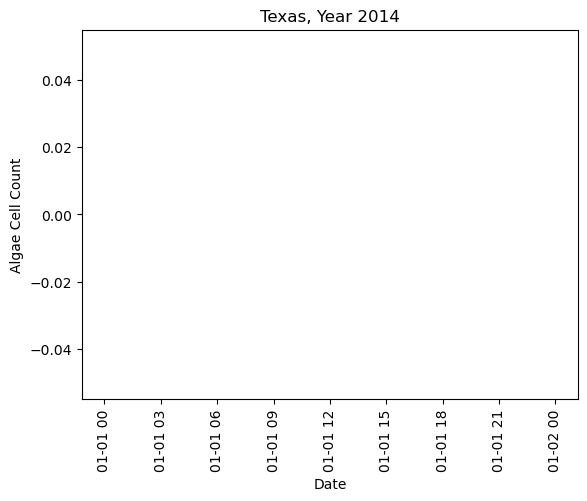

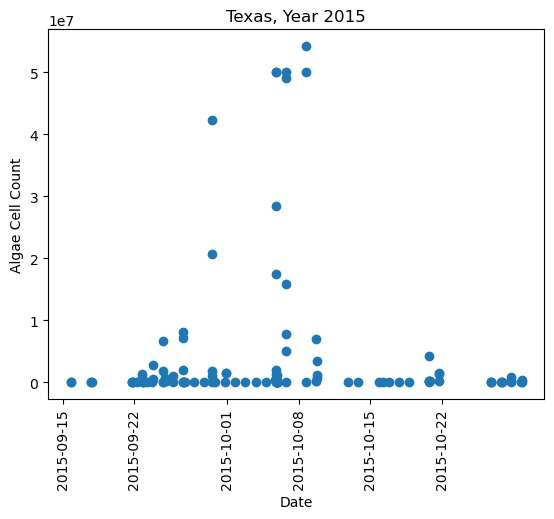

In [68]:
for i in range(2006,2016):
    plt.figure()
    y = abtexas.loc[(abtexas.SAMPLE_DATE >= datetime(i,1,1)) 
                      & (abtexas.SAMPLE_DATE < datetime(i+1,1,1))]['CELLCOUNT']
    x = abtexas.loc[(abtexas.SAMPLE_DATE >= datetime(i,1,1)) 
                      & (abtexas.SAMPLE_DATE < datetime(i+1,1,1))]['SAMPLE_DATE']

    plt.scatter(x,y)
    plt.title(f'Texas, Year {i}')
    plt.xlabel('Date')
    plt.xticks(rotation=90)
    plt.ylabel('Algae Cell Count')
plt.show()

### Texas seems to also havee bloom late in the year (around October) but this is largely a selection effect<span style=color:red> Even though there shouldn't be there seem to be some nans in the data.</span> <span style=color:blue> Need to look at these missing numbers along with the nans in the nan study</span>

In [ ]:
#Florida

C:\Users\Peter Doze\AppData\Local\Temp\ipykernel_13224\284171398.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


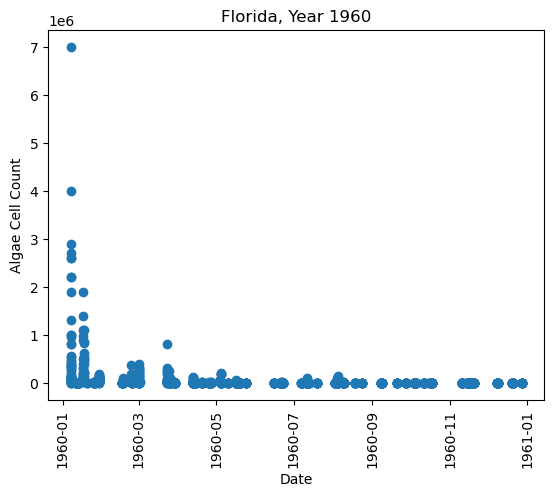

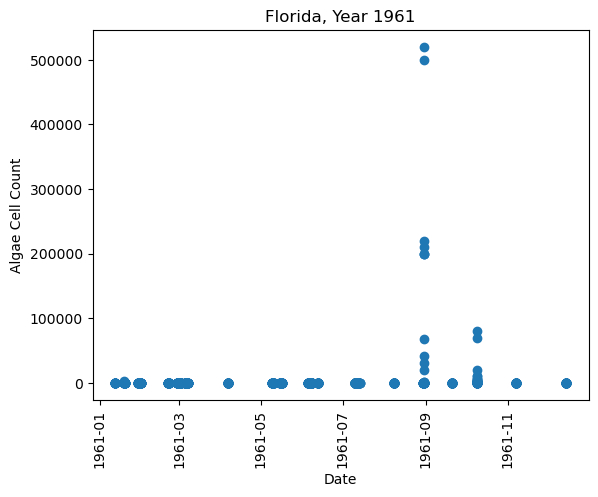

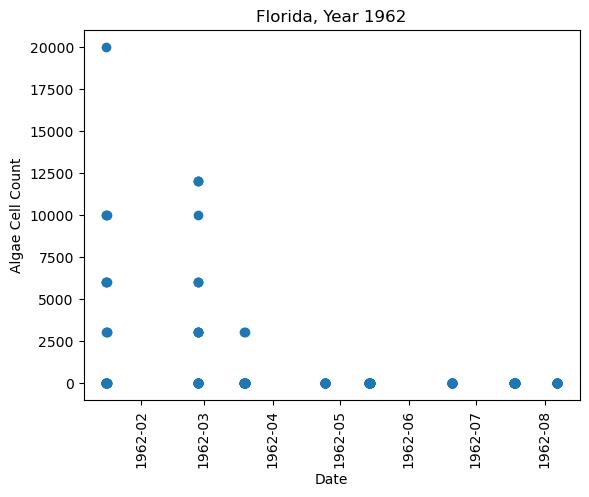

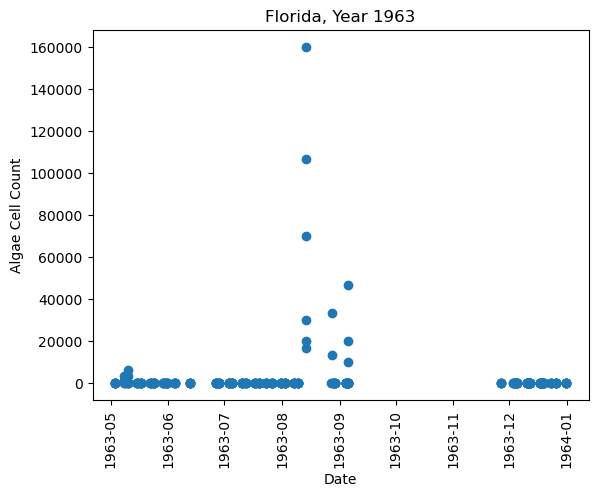

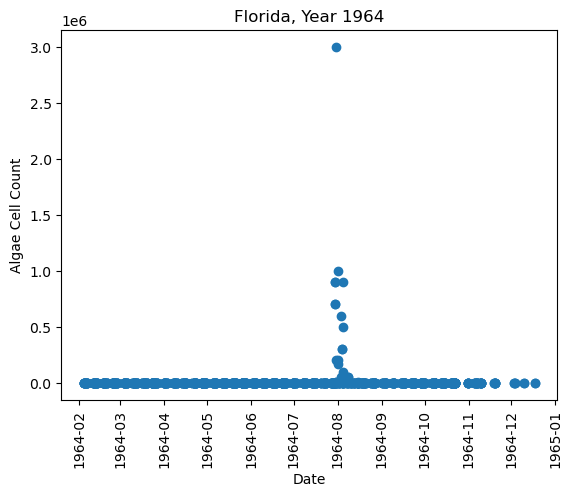

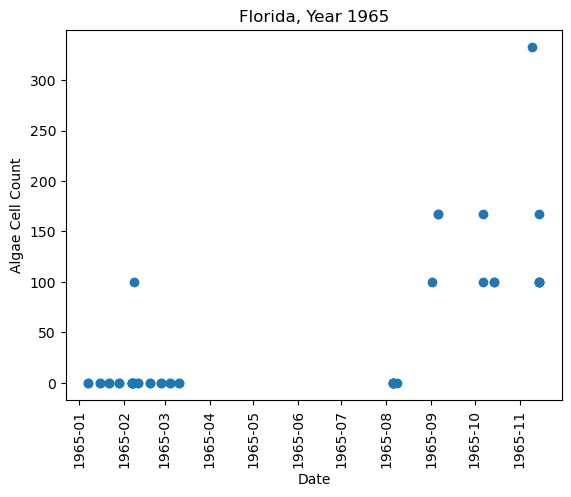

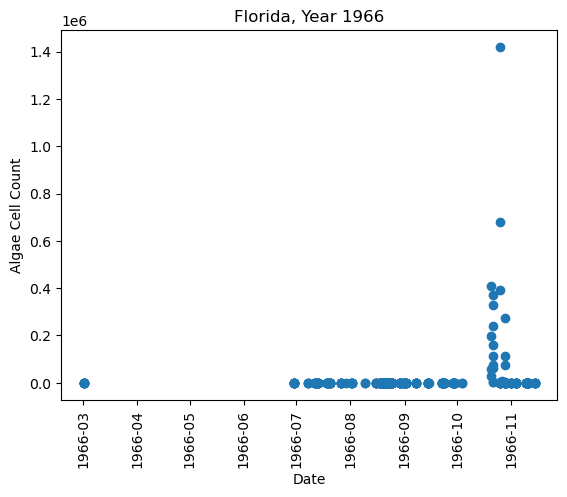

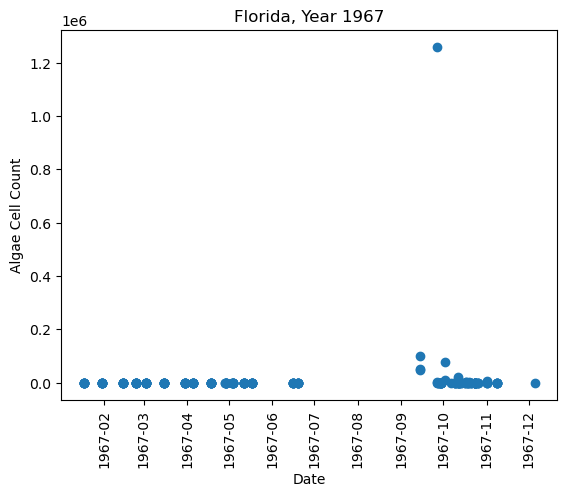

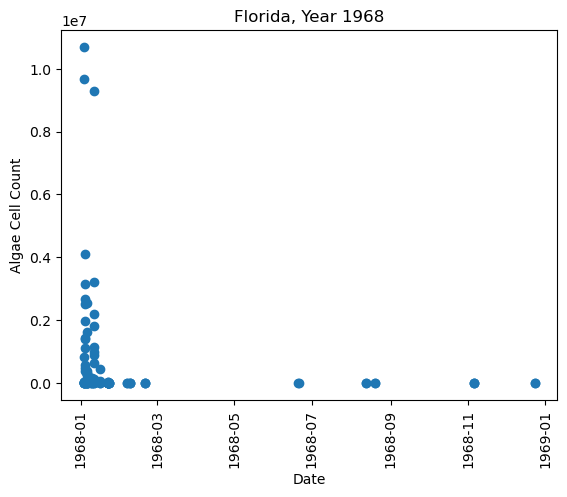

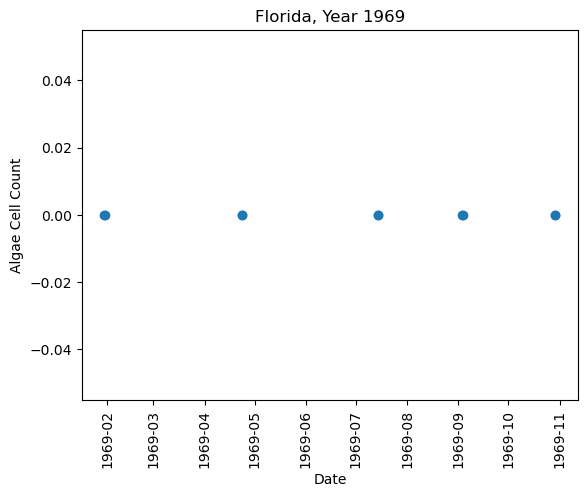

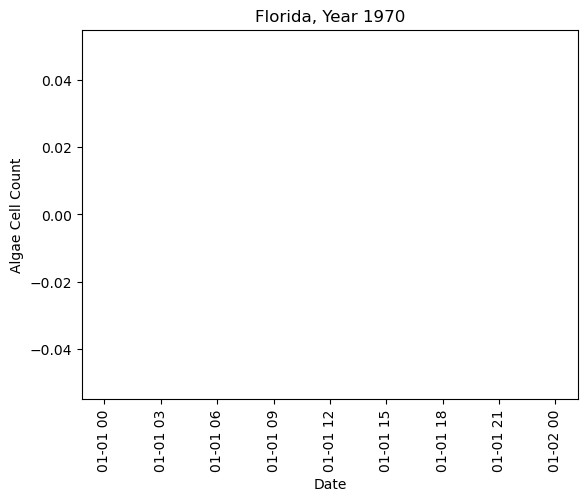

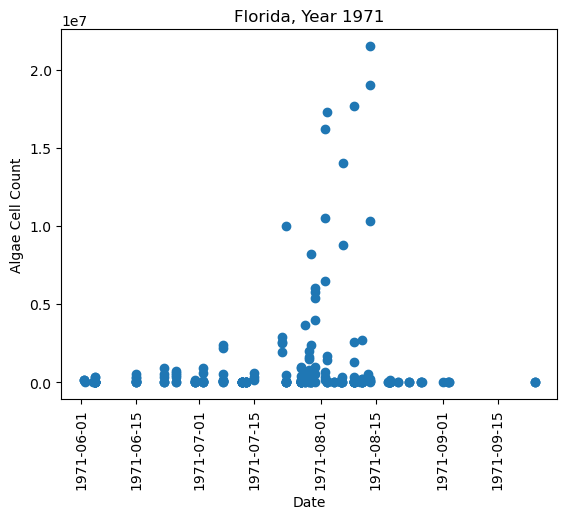

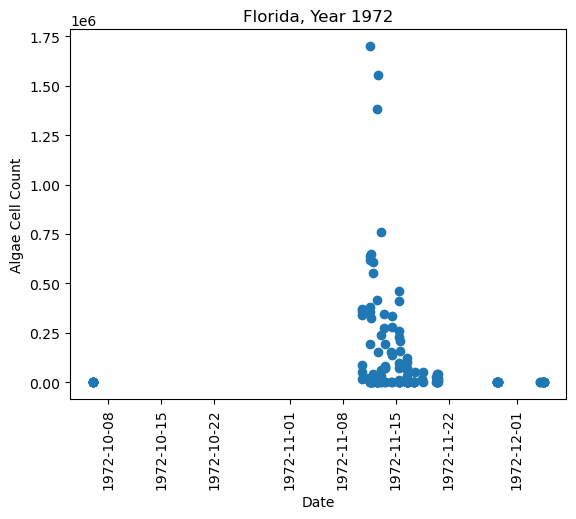

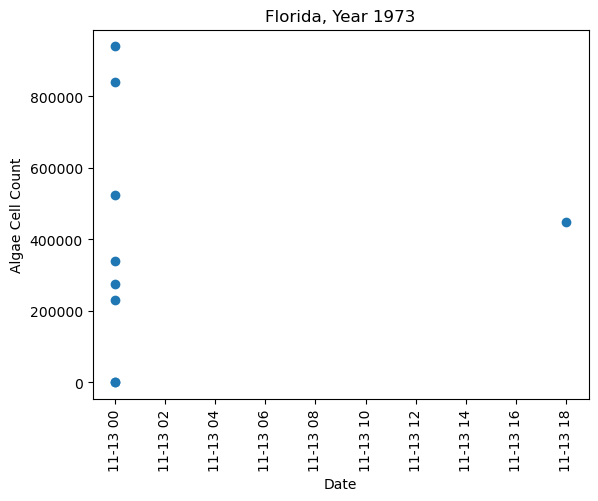

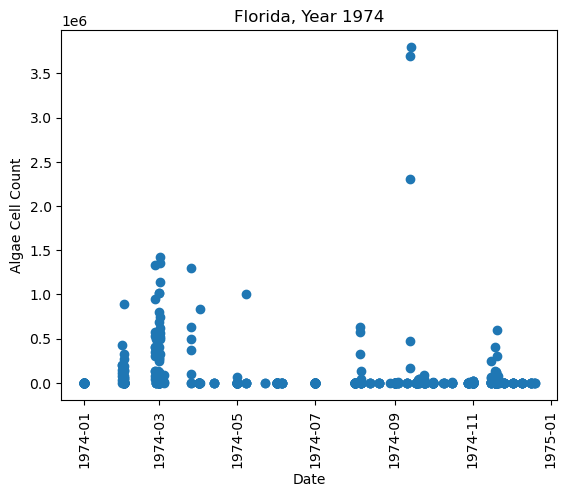

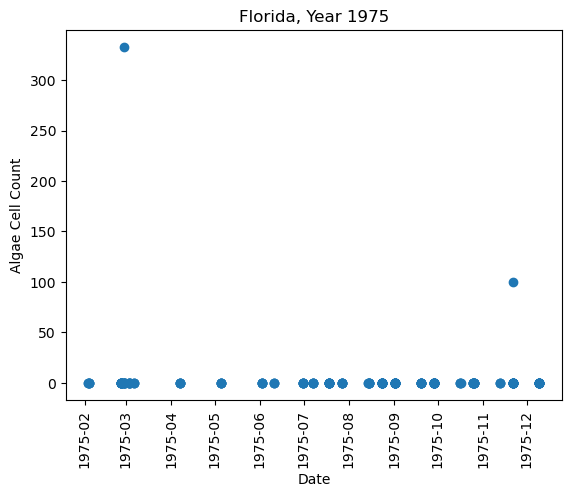

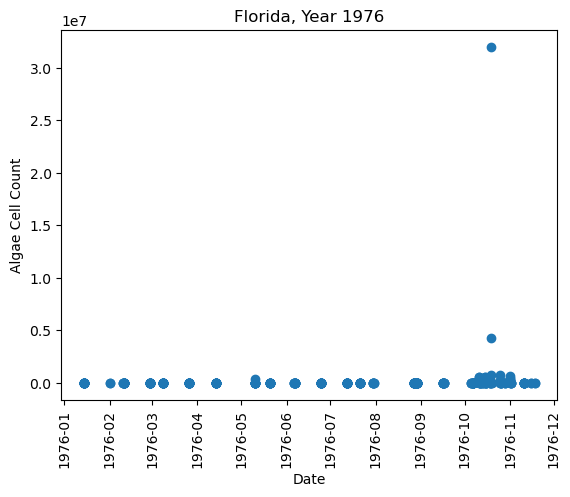

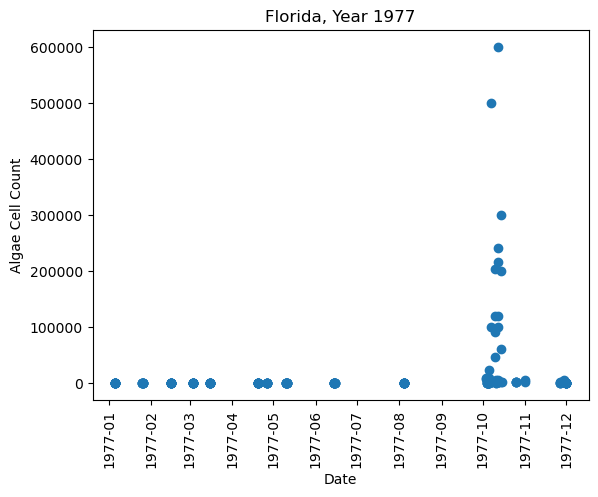

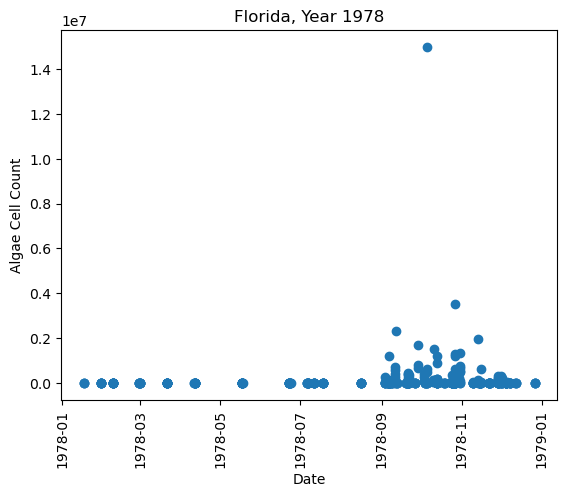

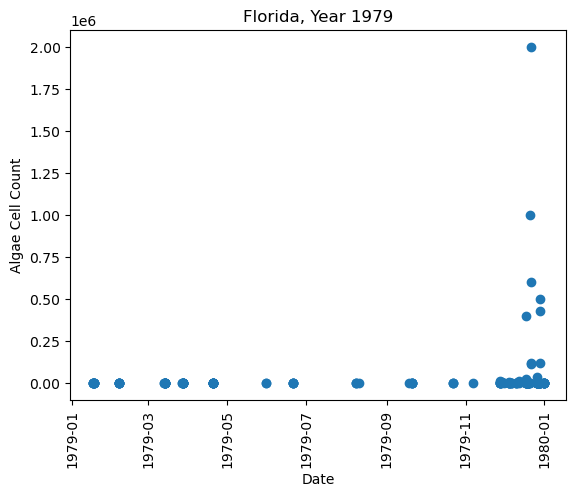

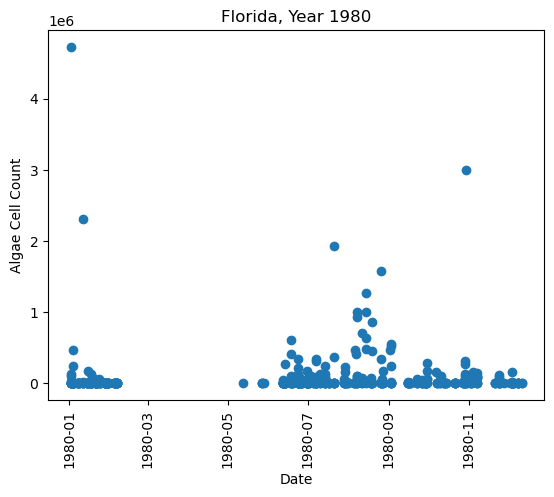

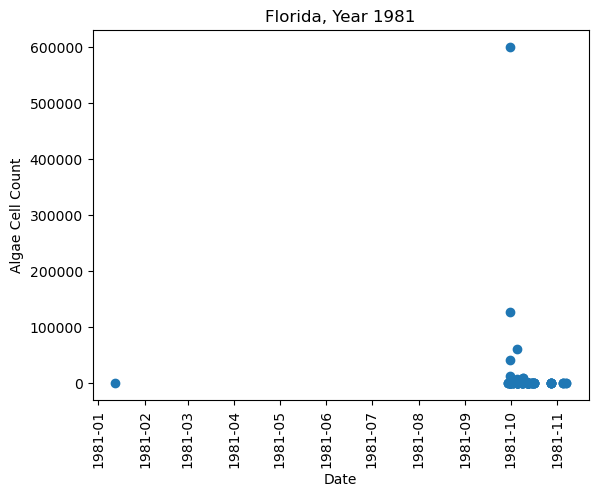

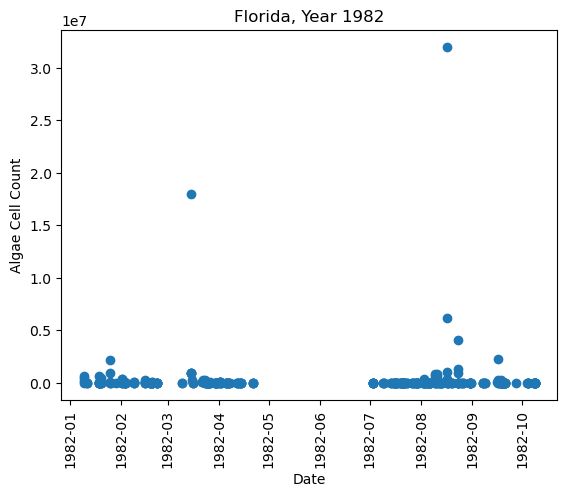

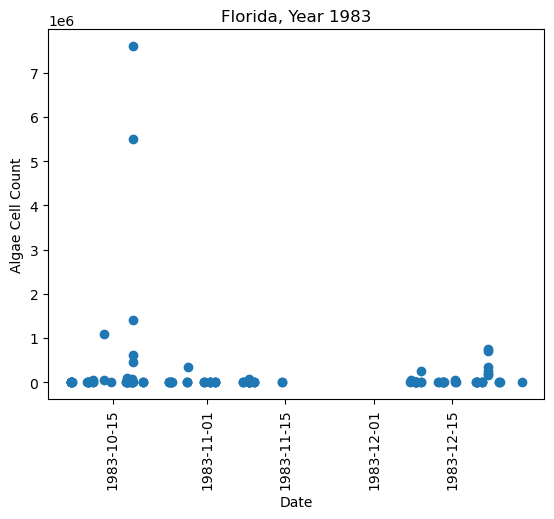

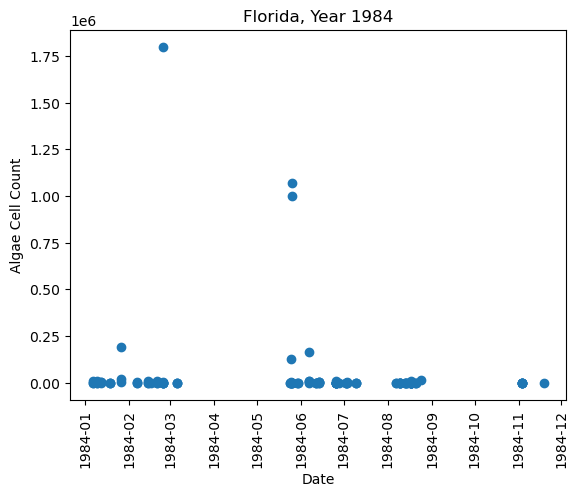

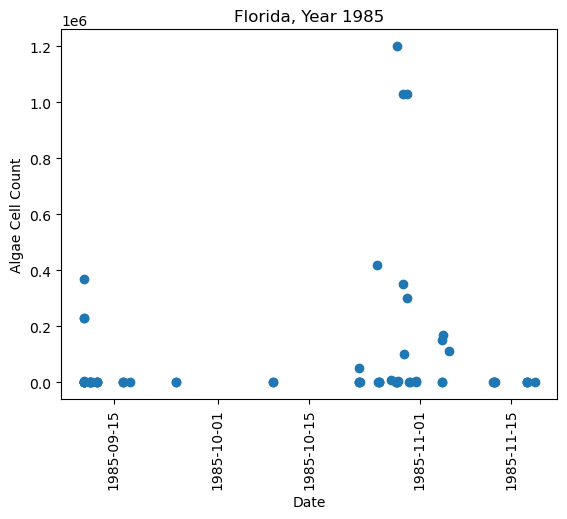

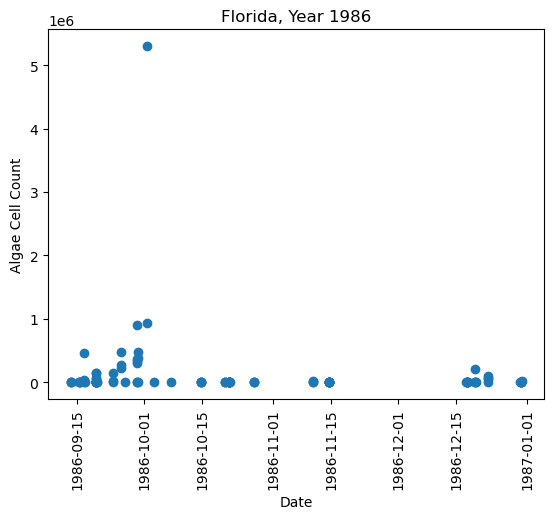

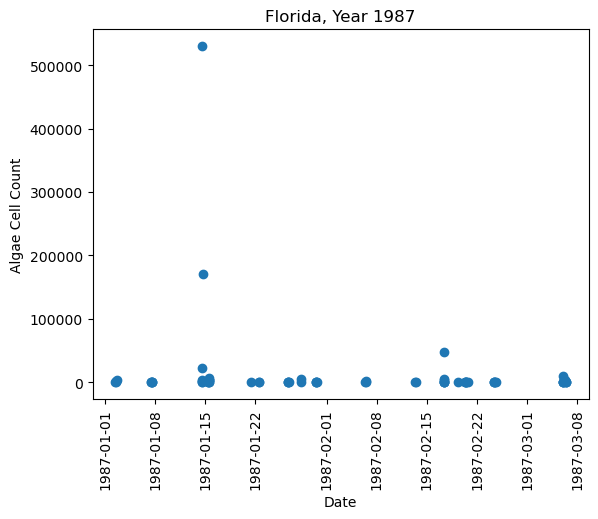

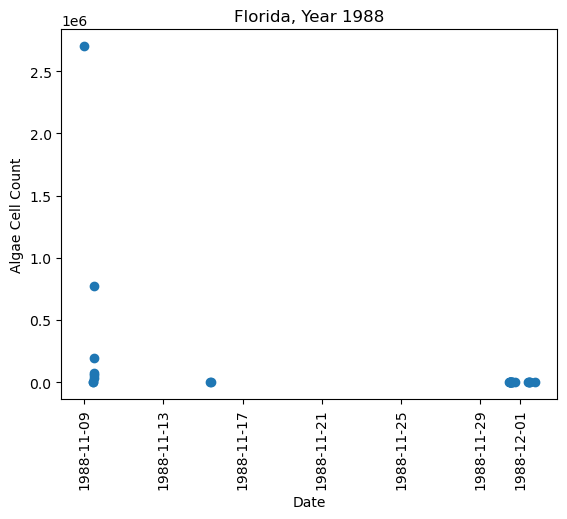

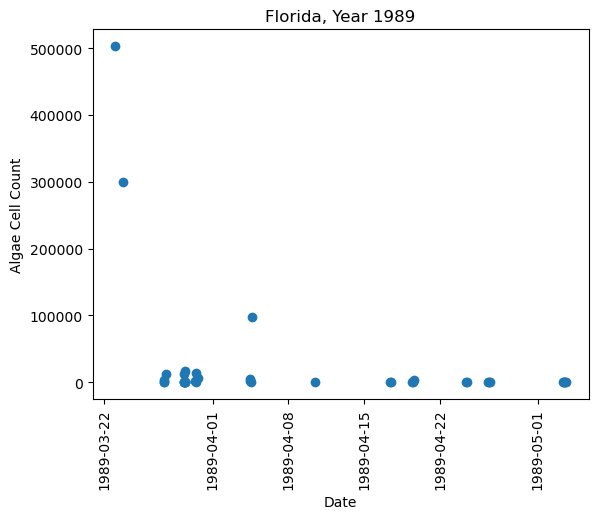

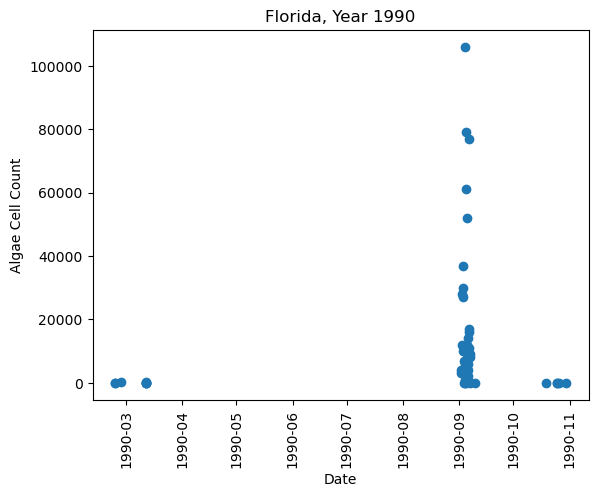

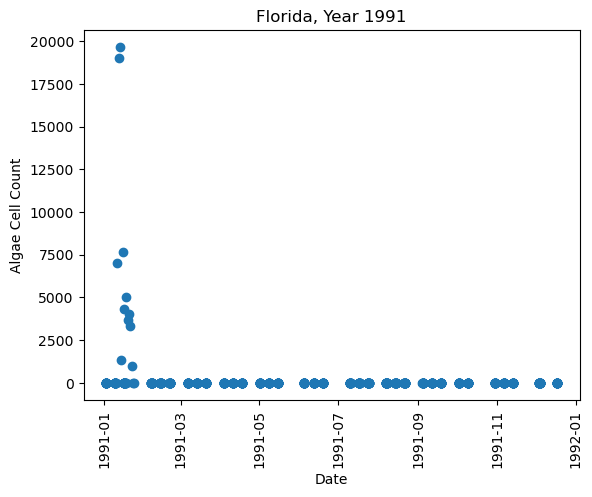

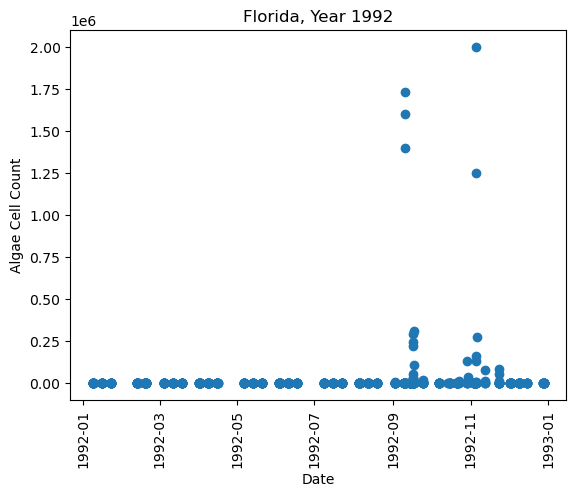

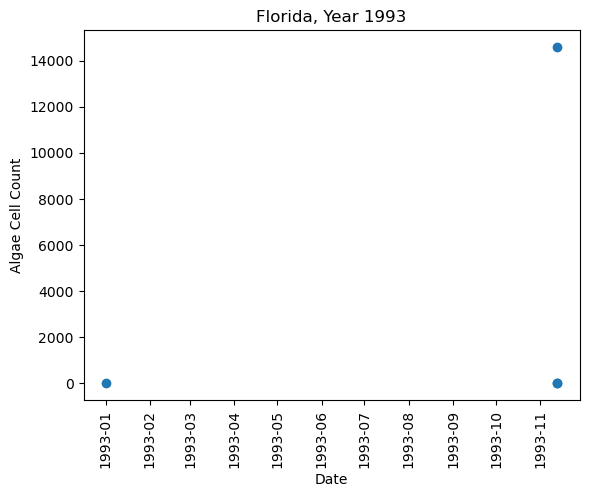

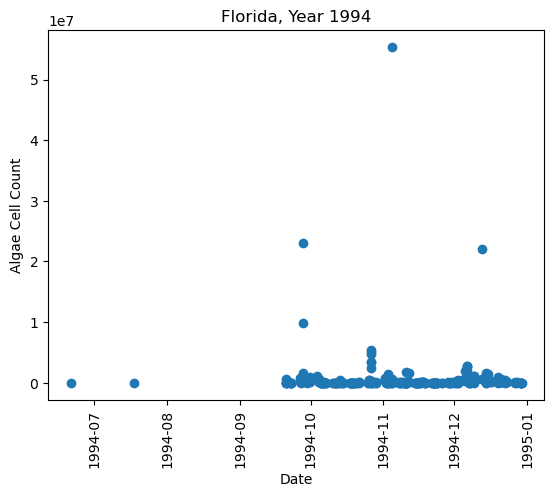

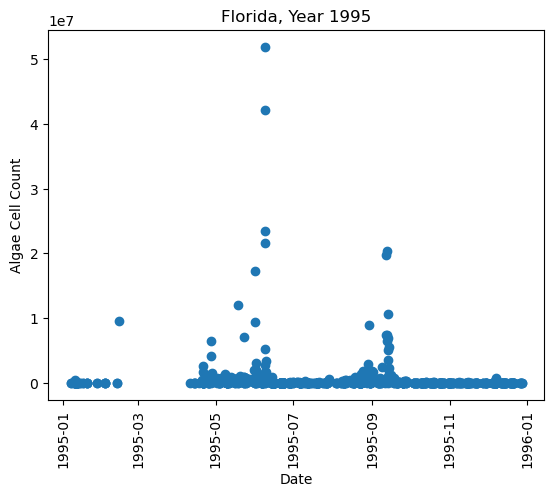

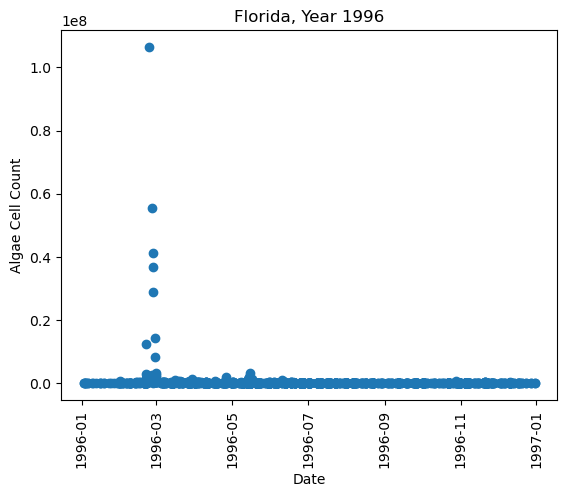

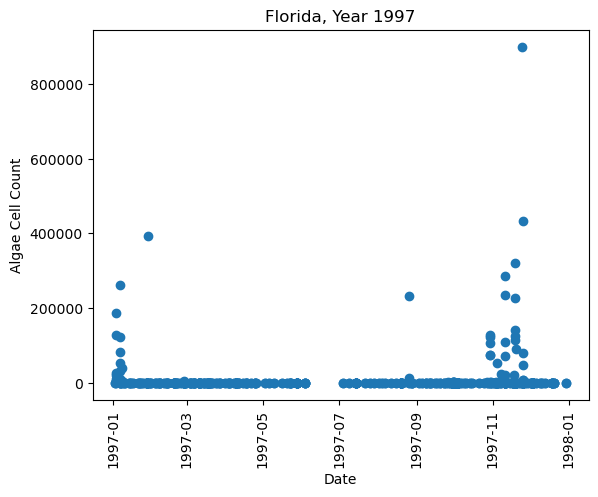

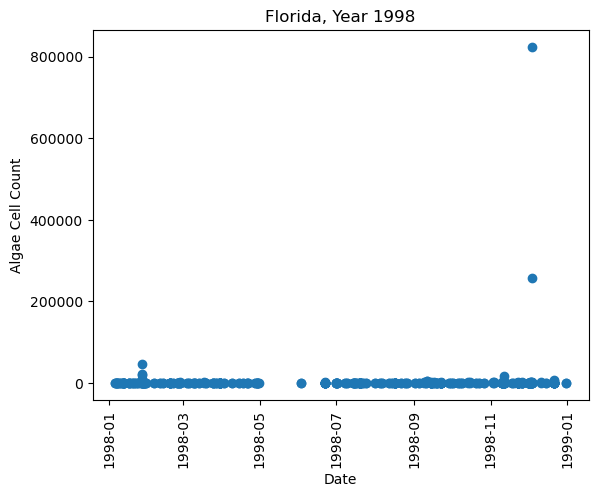

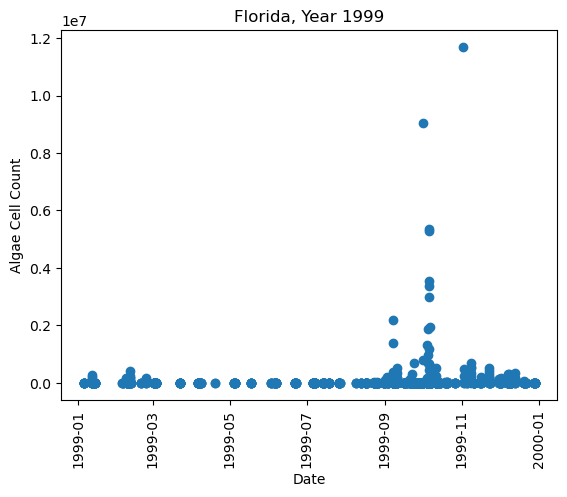

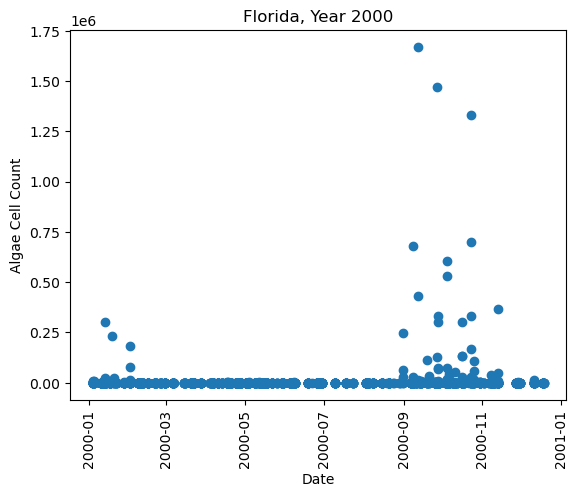

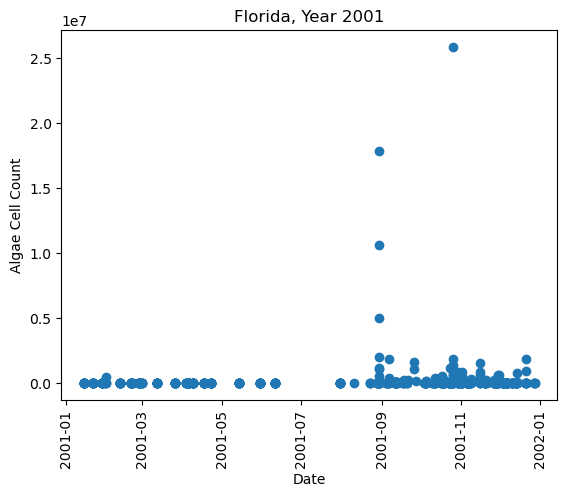

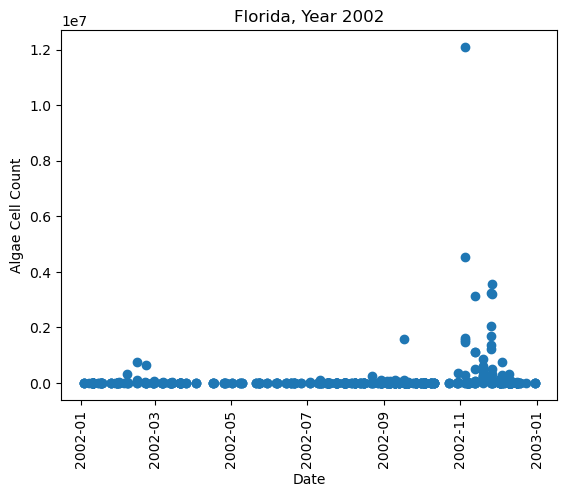

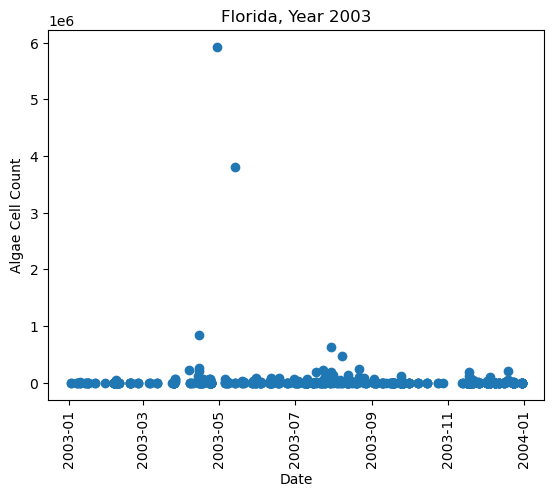

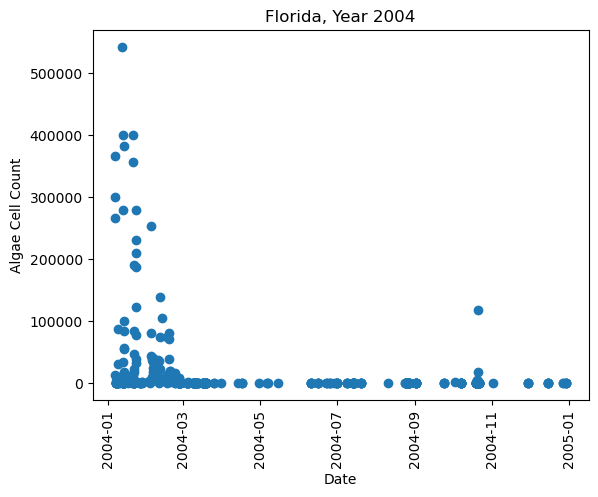

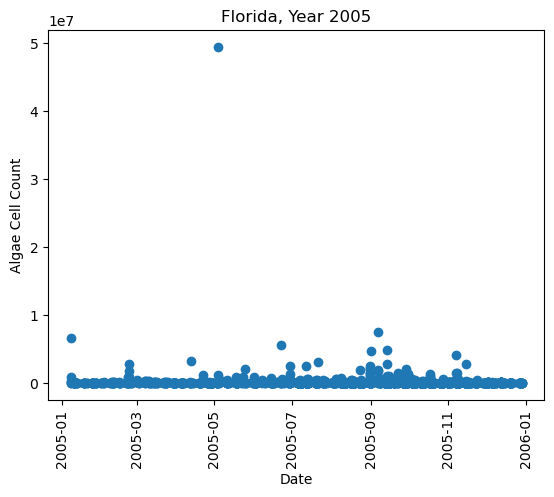

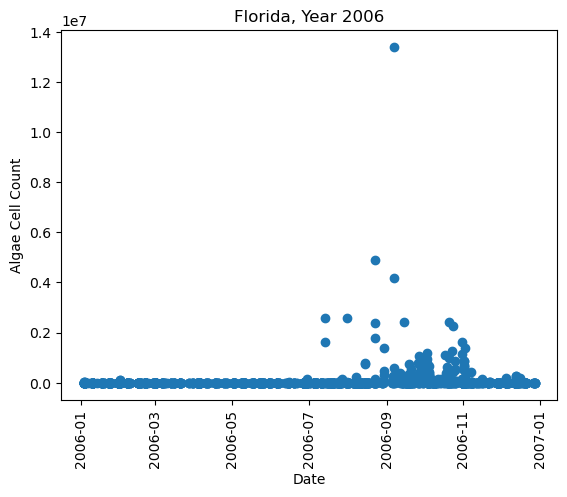

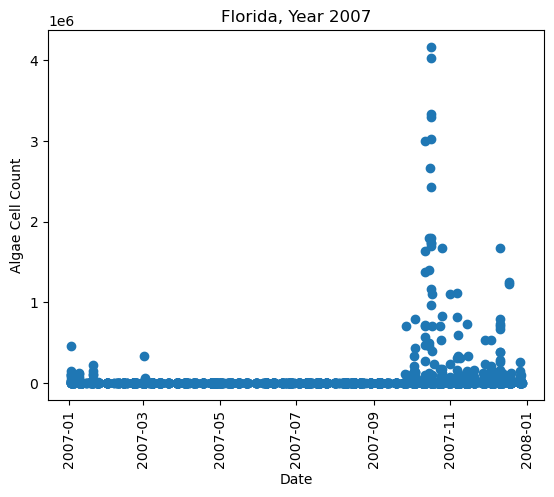

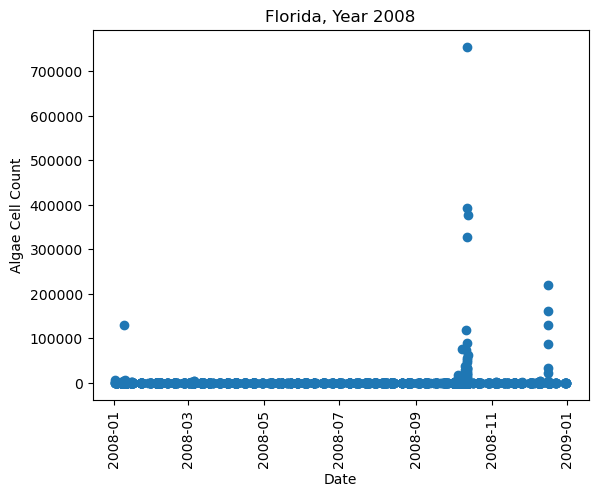

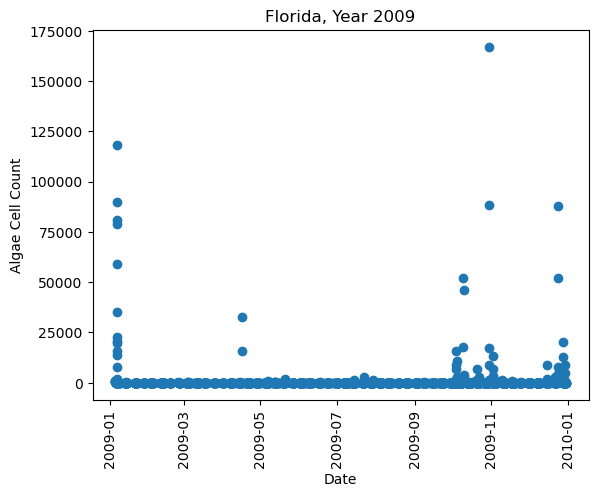

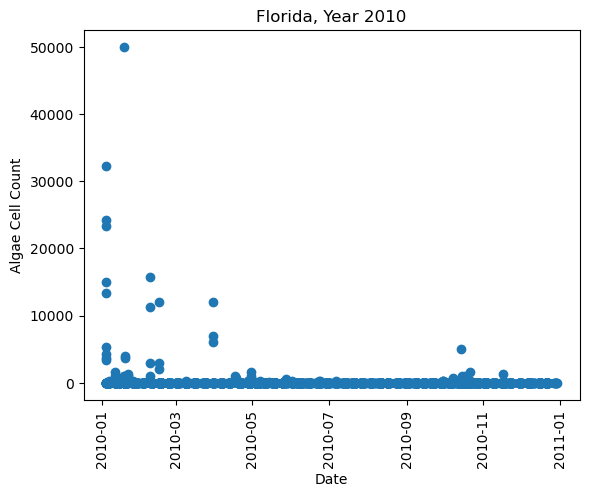

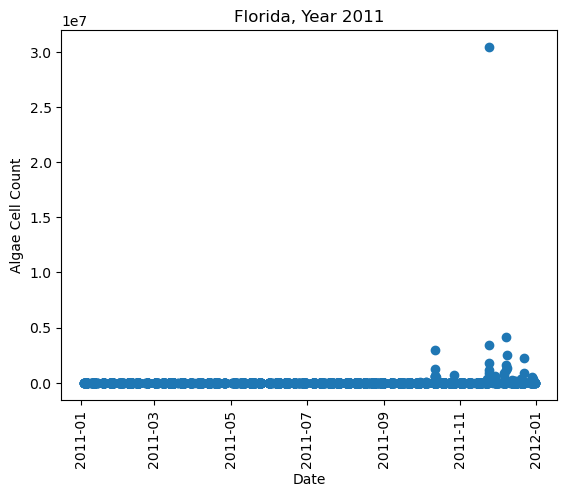

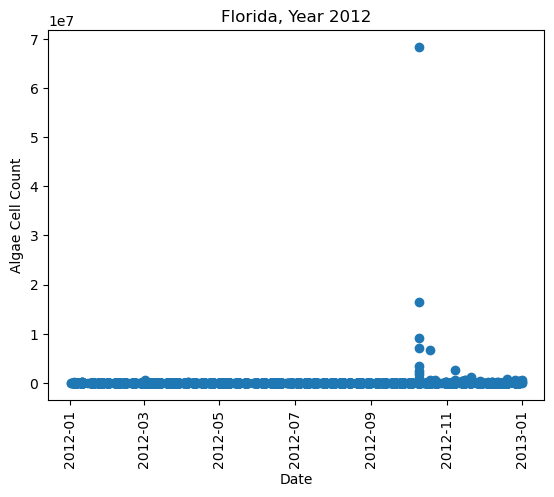

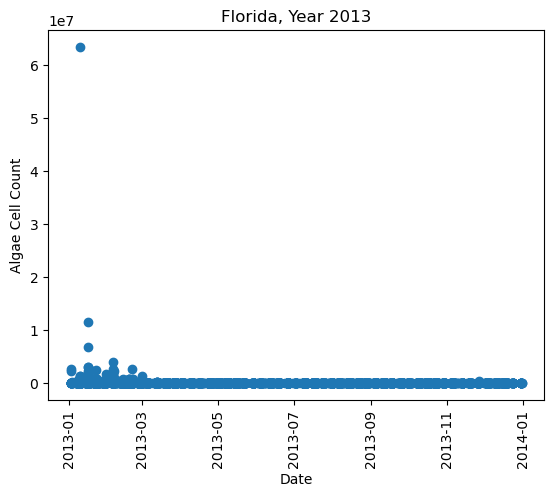

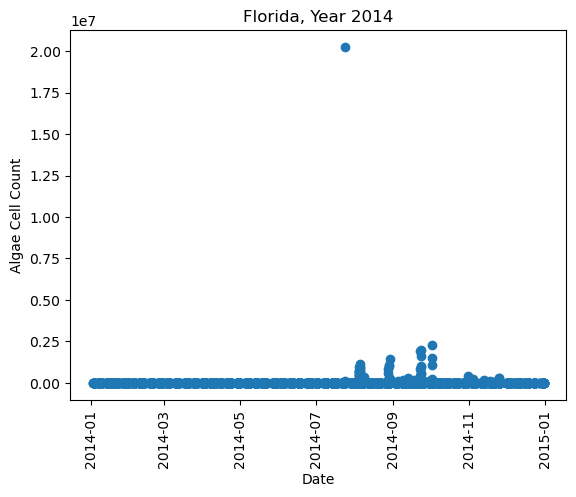

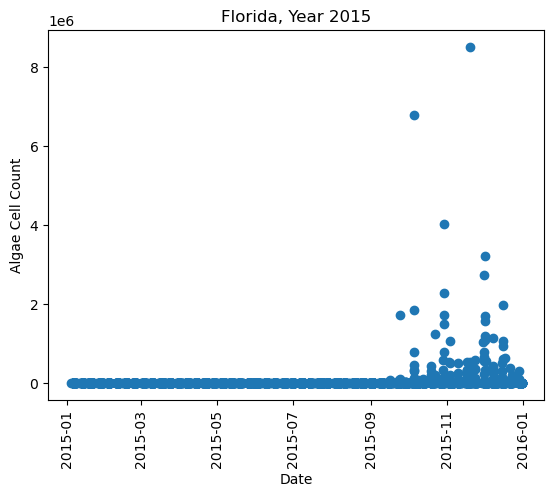

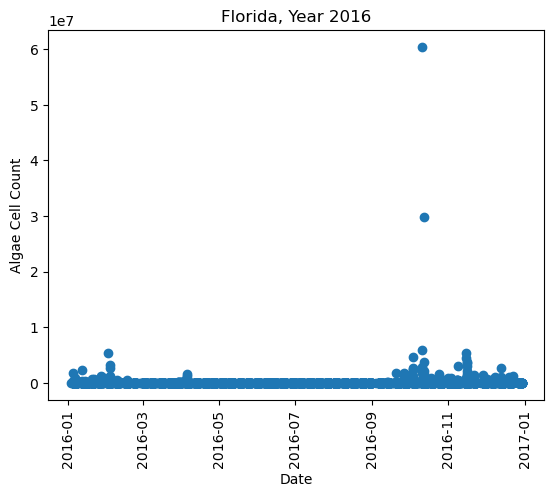

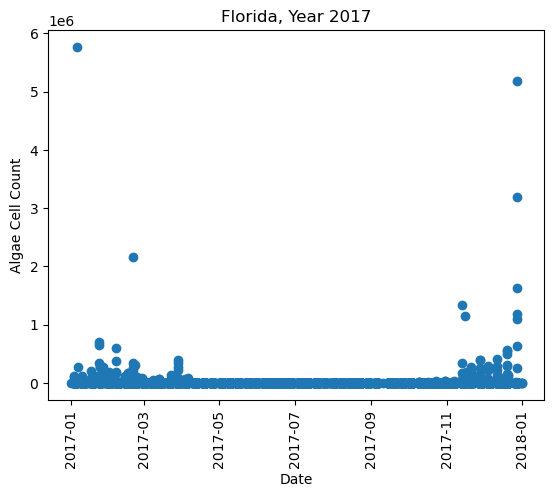

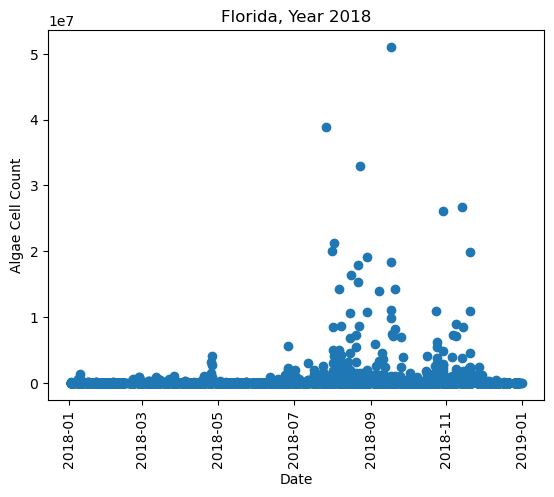

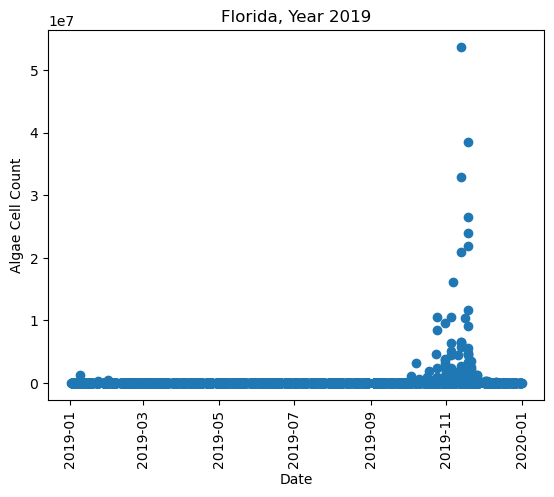

In [69]:
for i in range(1960,2020):
    plt.figure()
    y = abflorida.loc[(abflorida.SAMPLE_DATE >= datetime(i,1,1)) 
                      & (abflorida.SAMPLE_DATE < datetime(i+1,1,1))]['CELLCOUNT']
    x = abflorida.loc[(abflorida.SAMPLE_DATE >= datetime(i,1,1)) 
                      & (abflorida.SAMPLE_DATE < datetime(i+1,1,1))]['SAMPLE_DATE']

    plt.scatter(x,y)
    plt.title(f'Florida, Year {i}')
    plt.xlabel('Date')
    plt.xticks(rotation=90)
    plt.ylabel('Algae Cell Count')
plt.show()

## <span style=color:red> The frequency of the measurements is not consistent, but there seems to be a pattern of blooms in mid year (around May) and in the last 3-4 months of the year (usually around October or December) for Alabama, Texas, and Florida. Due to the geography Alabama might be getting contaminated by Florida.</span> <span style=color:blue> Need to quantify the frequency of the measurements.</span> 

In [81]:
#Genus is the same for every state
print(abtexas['SPECIES'].unique(), abmississippi['SPECIES'].unique(), abalabama['SPECIES'].unique(), abflorida['SPECIES'].unique())

['brevis'] ['brevis'] ['brevis'] ['brevis']


### <span style=color:red> Every state has the same genus and species of aglae. I don't think this is a contributing factor</span>

## Looking at how many algae bloom spikes there are in a year to see if there is a trend

In [84]:
abflorida['SAMPLE_DATE'].sort_values()[0:4]

47013   1954-02-05 08:55:00
47014   1954-02-05 09:35:00
47015   1954-02-05 11:35:00
47016   1954-02-05 11:52:00
Name: SAMPLE_DATE, dtype: datetime64[ns]

In [137]:
#look for a spike relative to that year for now
def spikesinyear(catalog,year1,year2):
    catalogyearspikes = {}
    for i in range(year1,year2):
        x = catalog.loc[(catalog.SAMPLE_DATE >= datetime(i,1,1)) 
                          & (catalog.SAMPLE_DATE < datetime(i+1,1,1))]['CELLCOUNT']
        peakmetric = x.mean()+1 #peak is defined as greater than the mean
        spikes = len(catalog.loc[(catalog.SAMPLE_DATE >= datetime(i,1,1)) 
                      & (catalog.SAMPLE_DATE < datetime(i+1,1,1))
                      & (catalog.CELLCOUNT>=peakmetric)]['CELLCOUNT'])

                
        catalogyearspikes[i] = spikes
    return catalogyearspikes
 

In [138]:
       

#alabama
alabamayearspikes = spikesinyear(abalabama,2010,2024)
alabamayearspikes

{2010: 9,
 2011: 4,
 2012: 12,
 2013: 2,
 2014: 1,
 2015: 11,
 2016: 13,
 2017: 4,
 2018: 5,
 2019: 2,
 2020: 3,
 2021: 6,
 2022: 14,
 2023: 1}

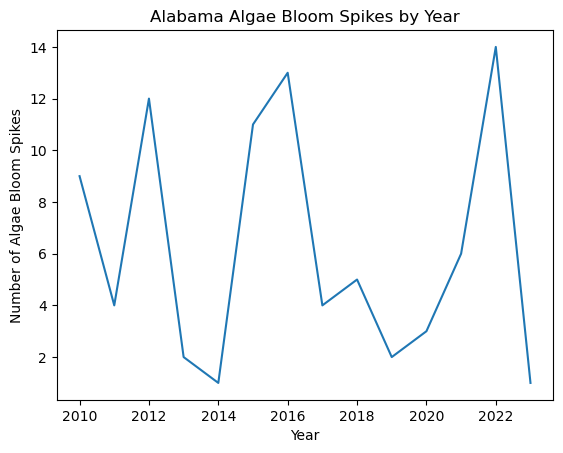

In [150]:
plt.plot(alabamayearspikes.keys(), alabamayearspikes.values())
plt.title('Alabama Algae Bloom Spikes by Year')
plt.xlabel('Year')
plt.ylabel('Number of Algae Bloom Spikes')
plt.show()


In [139]:
#florida
floridayearspikes = spikesinyear(abflorida,1960,2020)
floridayearspikes

{1960: 152,
 1961: 25,
 1962: 25,
 1963: 14,
 1964: 22,
 1965: 14,
 1966: 17,
 1967: 8,
 1968: 20,
 1969: 0,
 1970: 0,
 1971: 34,
 1972: 33,
 1973: 4,
 1974: 83,
 1975: 2,
 1976: 16,
 1977: 15,
 1978: 49,
 1979: 10,
 1980: 71,
 1981: 5,
 1982: 35,
 1983: 13,
 1984: 6,
 1985: 13,
 1986: 16,
 1987: 4,
 1988: 3,
 1989: 3,
 1990: 12,
 1991: 11,
 1992: 21,
 1993: 1,
 1994: 39,
 1995: 113,
 1996: 75,
 1997: 38,
 1998: 12,
 1999: 85,
 2000: 61,
 2001: 48,
 2002: 41,
 2003: 70,
 2004: 53,
 2005: 262,
 2006: 146,
 2007: 129,
 2008: 47,
 2009: 75,
 2010: 63,
 2011: 90,
 2012: 142,
 2013: 176,
 2014: 163,
 2015: 146,
 2016: 327,
 2017: 218,
 2018: 471,
 2019: 196}

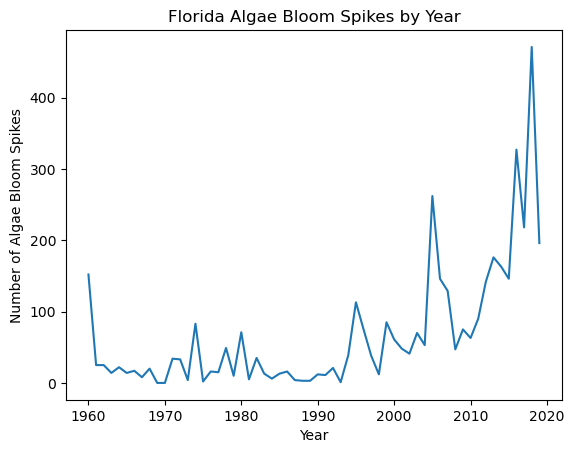

In [153]:
plt.plot(floridayearspikes.keys(), floridayearspikes.values())
plt.title('Florida Algae Bloom Spikes by Year')
plt.xlabel('Year')
plt.ylabel('Number of Algae Bloom Spikes')
plt.show()

In [140]:
#mississippi
mississippiyearspikes = spikesinyear(abmississippi,2010,2022)
mississippiyearspikes

{2010: 0,
 2011: 0,
 2012: 0,
 2013: 0,
 2014: 0,
 2015: 12,
 2016: 0,
 2017: 0,
 2018: 0,
 2019: 0,
 2020: 0,
 2021: 0}

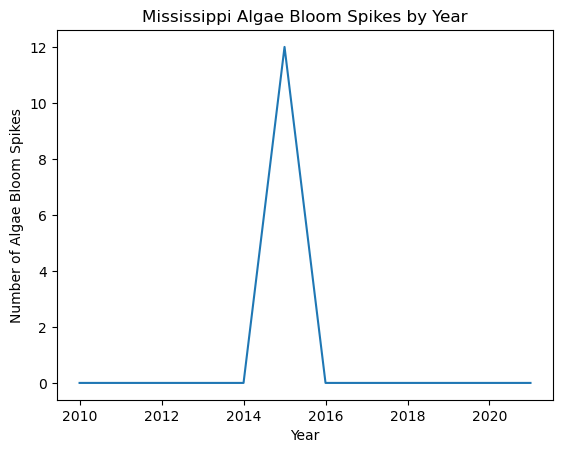

In [152]:
plt.plot(mississippiyearspikes.keys(), mississippiyearspikes.values())
plt.title('Mississippi Algae Bloom Spikes by Year')
plt.xlabel('Year')
plt.ylabel('Number of Algae Bloom Spikes')
plt.show()

In [141]:
#texas
texasyearspikes = spikesinyear(abtexas,2006,2016)
texasyearspikes

{2006: 19,
 2007: 0,
 2008: 0,
 2009: 30,
 2010: 1,
 2011: 61,
 2012: 33,
 2013: 7,
 2014: 0,
 2015: 17}

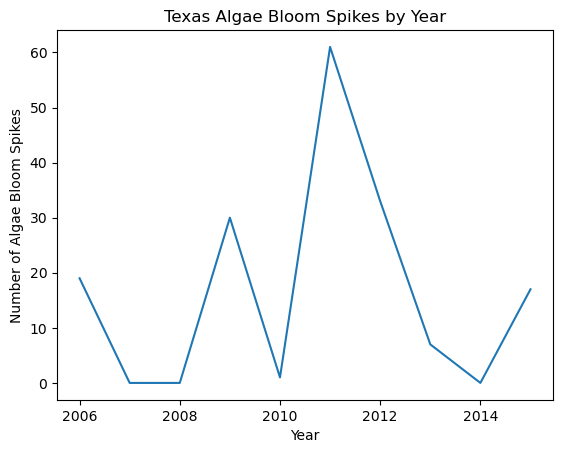

In [151]:
plt.plot(texasyearspikes.keys(), texasyearspikes.values())
plt.title('Texas Algae Bloom Spikes by Year')
plt.xlabel('Year')
plt.ylabel('Number of Algae Bloom Spikes')
plt.show()

## <span style=color:purple> It is kind of hard to tell by eye but I think there might be a trend of there being more blooms in the later years at least with Florida. Florida is the only state with a long enough history. Regardless we might want to think about a supplementary analysis that simply quantifies if there is a trend (mine time series analysis)</span>

## Lets try to look at each year but for the whole data

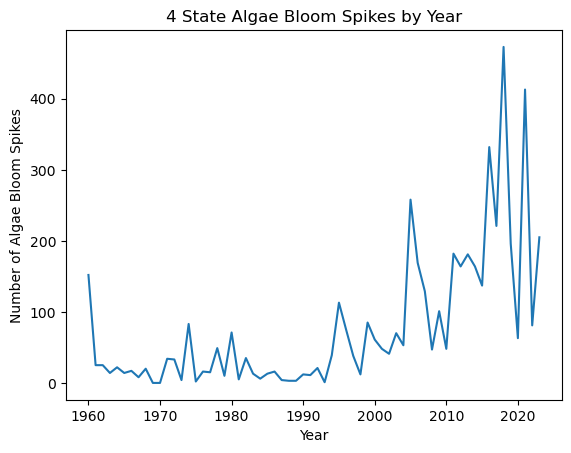

In [154]:
#First the whole (most of) time range
totalyearspikes = spikesinyear(AB2,1960,2024)

plt.plot(totalyearspikes.keys(), totalyearspikes.values())
plt.title('4 State Algae Bloom Spikes by Year')
plt.xlabel('Year')
plt.ylabel('Number of Algae Bloom Spikes')
plt.show()

## <span style=color:red> Data is undoubtedly being dominated by Florida </span>

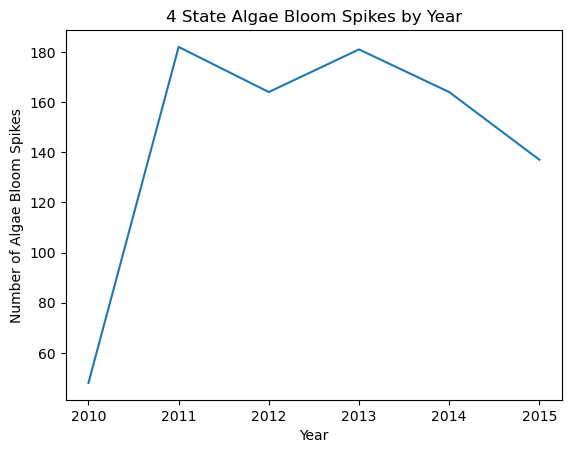

In [155]:
#Now lets try over a range where there is data for everyone
totalyearspikes = spikesinyear(AB2,2010,2016)

plt.plot(totalyearspikes.keys(), totalyearspikes.values())
plt.title('4 State Algae Bloom Spikes by Year')
plt.xlabel('Year')
plt.ylabel('Number of Algae Bloom Spikes')
plt.show()

## <span style=color:purple>The years are too few, we'll probably have to just use all the data together if we can't find a latittude dependencey. Then test it on Florida?</span>

## Quantifying frequency of the measurements

In [ ]:
#how to do time difference with datetime

# Lets see if there is latittude (lat/long) dependency

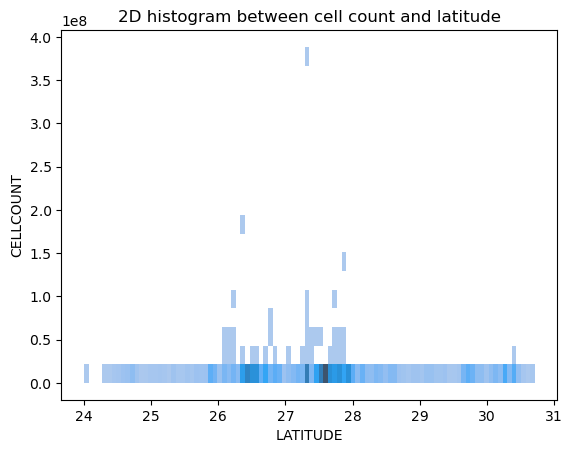

In [159]:
#Looking at the entire dataset (sans nans)
sns.histplot(data=AB2, y='CELLCOUNT', x='LATITUDE')
plt.title('2D histogram between cell count and latitude')
plt.xlabel('LATITUDE')
plt.ylabel('CELLCOUNT')
plt.show()

## There seems to be a slight dependence favoring latitude roughly between 26 and 28 but this basically just spans the height of Texas and Florida from their bottom tips

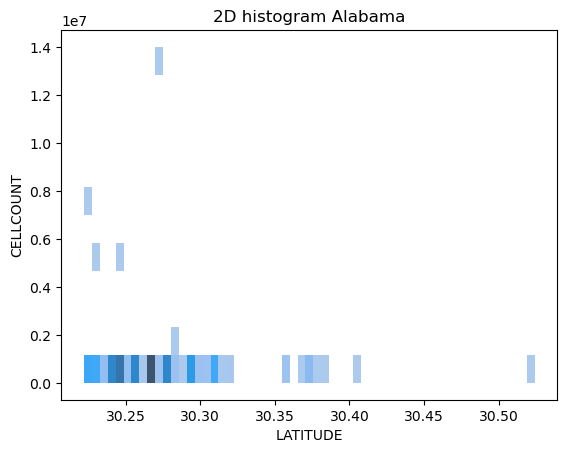

In [160]:
#Looking at the entire dataset (sans nans)
sns.histplot(data=abalabama, y='CELLCOUNT', x='LATITUDE')
plt.title('2D histogram Alabama')
plt.xlabel('LATITUDE')
plt.ylabel('CELLCOUNT')
plt.show()

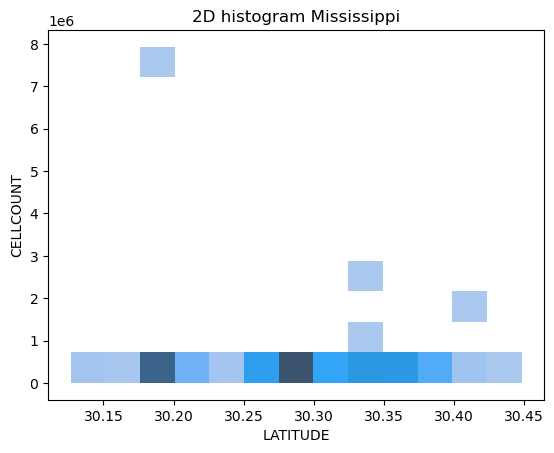

In [161]:
#Looking at the entire dataset (sans nans)
sns.histplot(data=abmississippi, y='CELLCOUNT', x='LATITUDE')
plt.title('2D histogram Mississippi')
plt.xlabel('LATITUDE')
plt.ylabel('CELLCOUNT')
plt.show()

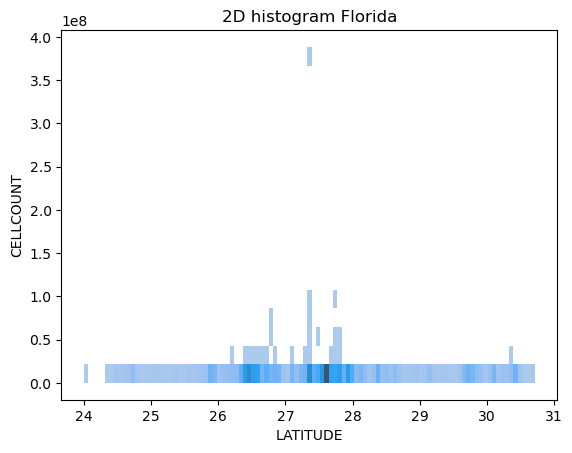

In [162]:
#Looking at the entire dataset (sans nans)
sns.histplot(data=abflorida, y='CELLCOUNT', x='LATITUDE')
plt.title('2D histogram Florida')
plt.xlabel('LATITUDE')
plt.ylabel('CELLCOUNT')
plt.show()

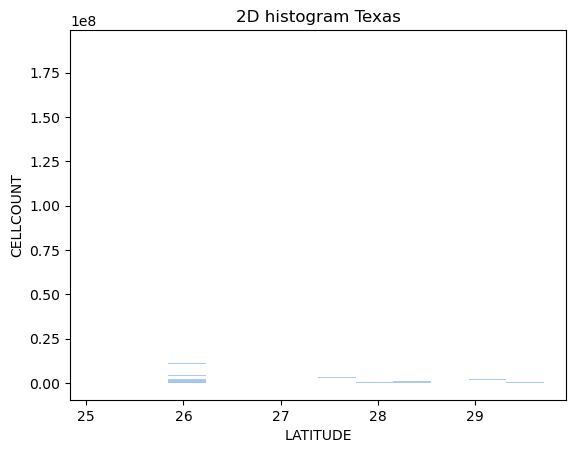

In [164]:
#Looking at the entire dataset (sans nans)
sns.histplot(data=abtexas, y='CELLCOUNT', x='LATITUDE')
plt.title('2D histogram Texas')
plt.xlabel('LATITUDE')
plt.ylabel('CELLCOUNT')
plt.show()